# 제로베이스 데이터 사이언스 스쿨 EDA Level Test 4

In [1]:
# 문제 1

# 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화하시오.
# 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히 증가합니다.
# 이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이 있었는지를 추측해보세요
# 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.

import pandas as pd
import numpy as np
import chardet

with open('C:/Users/home/Desktop/globalterrorismdb_0718dist.csv', 'rb') as f:
    result = chardet.detect(f.read())

df_terror = pd.read_csv('C:/Users/home/Desktop/globalterrorismdb_0718dist.csv', encoding=result['encoding'])
df_terror

C:\Users\home\AppData\Local\Temp\ipykernel_27848\160112535.py:15: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_terror = pd.read_csv('C:/Users/home/Desktop/globalterrorismdb_0718dist.csv', encoding=result['encoding'])


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<Axes: xlabel='iyear'>

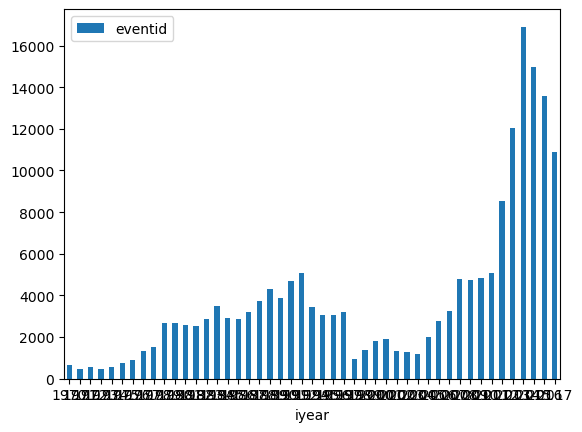

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_terror_visualization = df_terror.groupby("iyear").count().reset_index()
df_terror_visualization.plot.bar(x='iyear', y='eventid', rot=0)

### 2012년부터 테러횟수가 증가하기 시작하였다.
### 테러의 개념이 변하고 일반인을 대상으로 하는 테러가 늘었기 때문으로 추정.

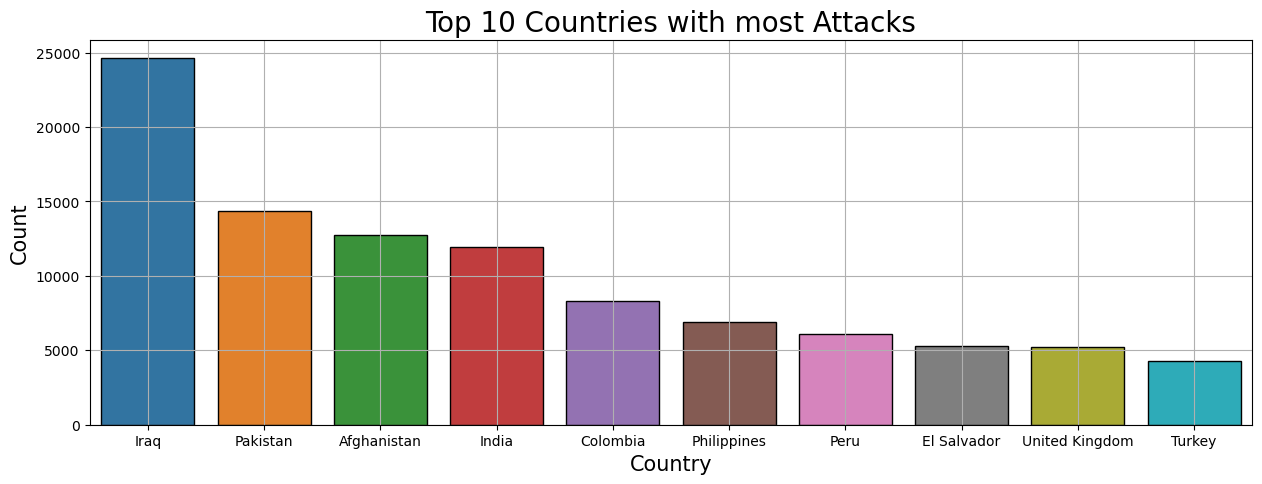

In [24]:
# 문제 2
# 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서
# 상위 10위의 국가를 시각화하세요
df_terror_top_10 = df_terror.groupby("country_txt").count().reset_index()
df_terror_top_10 = df_terror_top_10.sort_values(by='eventid', ascending=False).head(10)
# df_terror_top_10.plot.bar(x='country_txt', y='eventid', rot=0)

plt.figure(figsize=(15,5))
sns.barplot(data=df_terror_top_10,x='country_txt',y='eventid',ec='black',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with most Attacks',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_37524\858588177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terror_top_10_kill_wound['ratio'] = (df_terror_top_10_kill_wound['nkill'] + df_terror_top_10_kill_wound['nwound']) / df_terror_top_10_kill_wound['eventid']


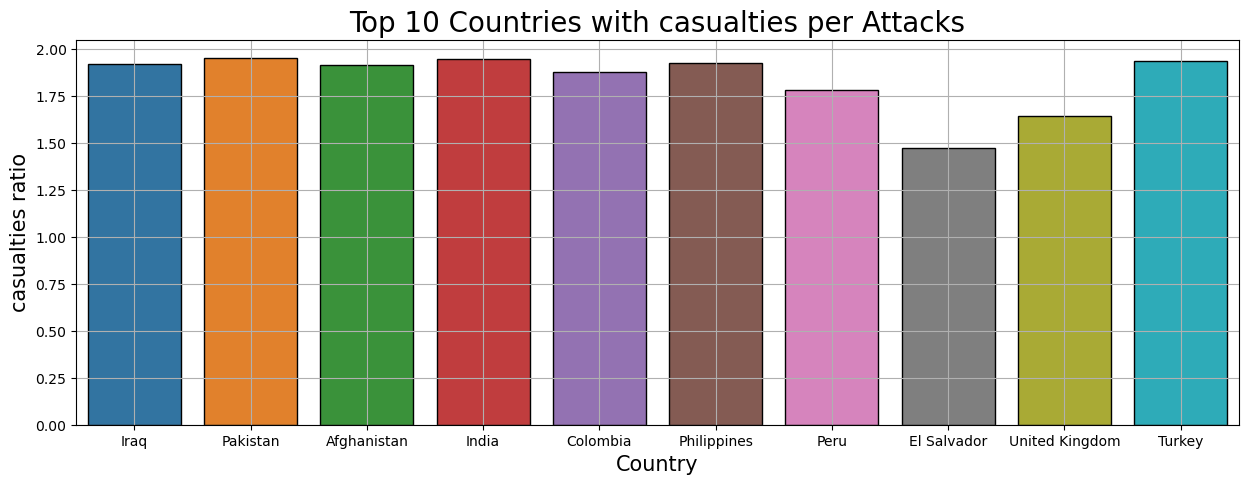

In [29]:
# 문제 3
# 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해
# 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.
# 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.
# 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고,
# 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다
df_terror_top_10_kill_wound = df_terror_top_10[['country_txt', 'eventid', 'nkill', 'nwound']]
df_terror_top_10_kill_wound['ratio'] = (df_terror_top_10_kill_wound['nkill'] + df_terror_top_10_kill_wound['nwound']) / df_terror_top_10_kill_wound['eventid']
df_terror_top_10_kill_wound[['country_txt', 'ratio', 'nkill', 'nwound', 'eventid']]

plt.figure(figsize=(15,5))
sns.barplot(data=df_terror_top_10_kill_wound, x='country_txt',y='ratio',ec='black',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with casualties per Attacks',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('casualties ratio',fontsize=15)
plt.show()

0                            Armed Assault
1                            Assassination
2                        Bombing/Explosion
3           Facility/Infrastructure Attack
4                                Hijacking
                      ...                 
103                              Hijacking
104    Hostage Taking (Barricade Incident)
105            Hostage Taking (Kidnapping)
106                        Unarmed Assault
107                                Unknown
Name: attacktype1_txt, Length: 108, dtype: object


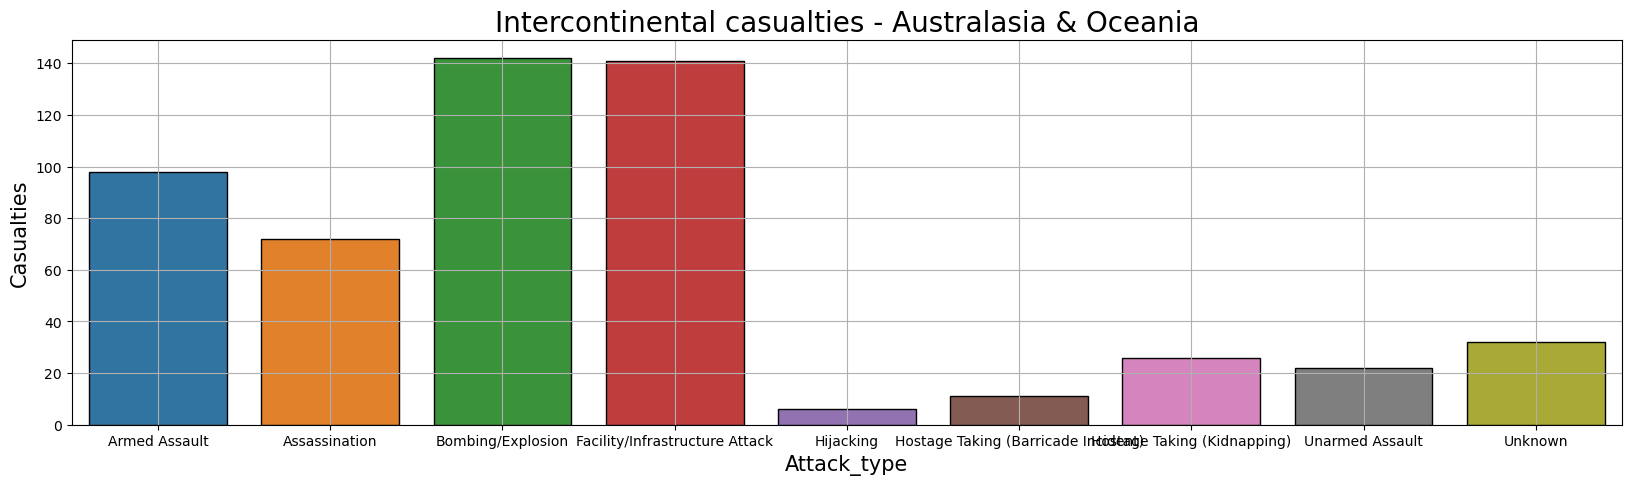

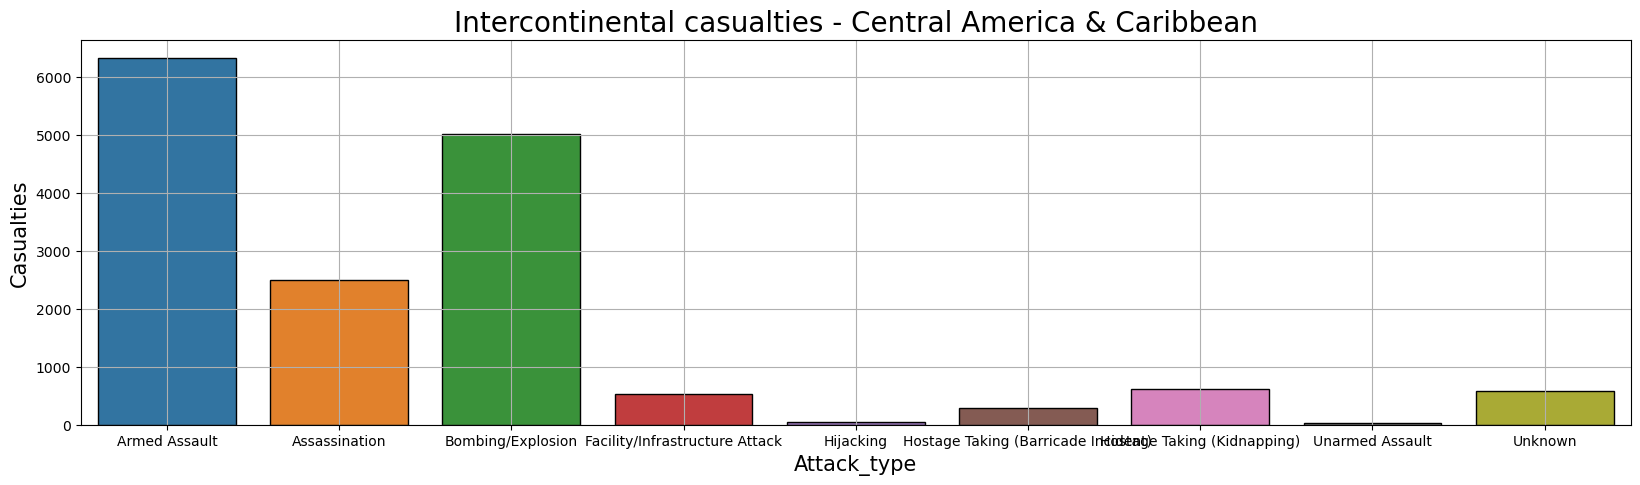

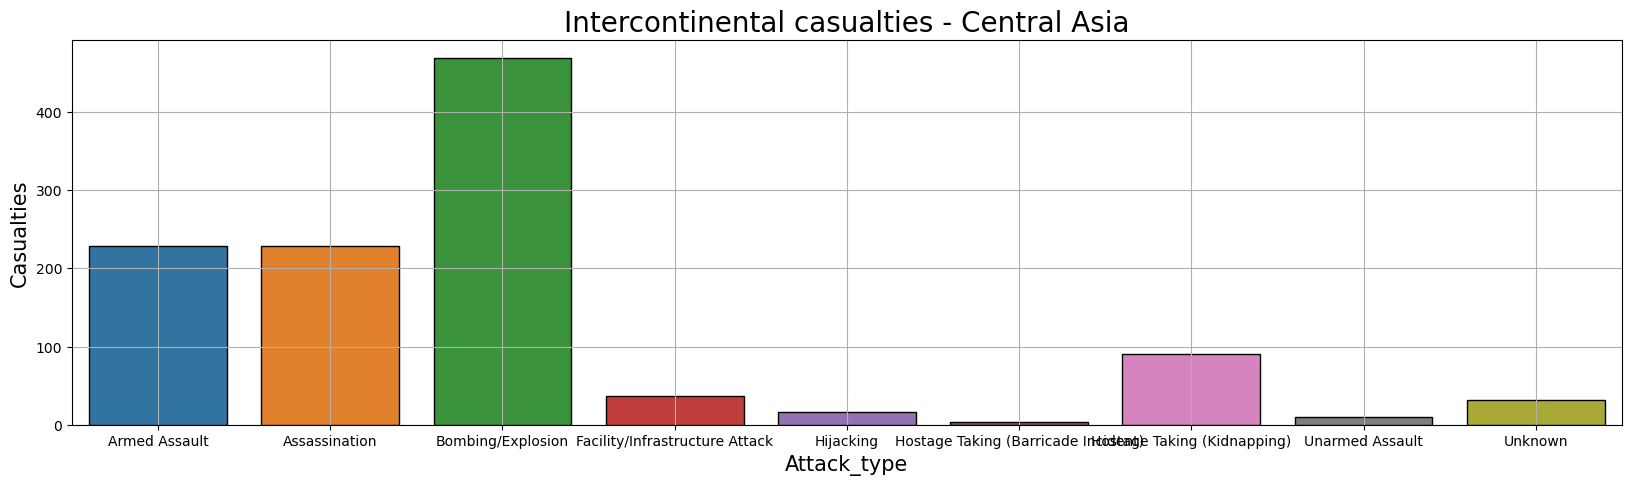

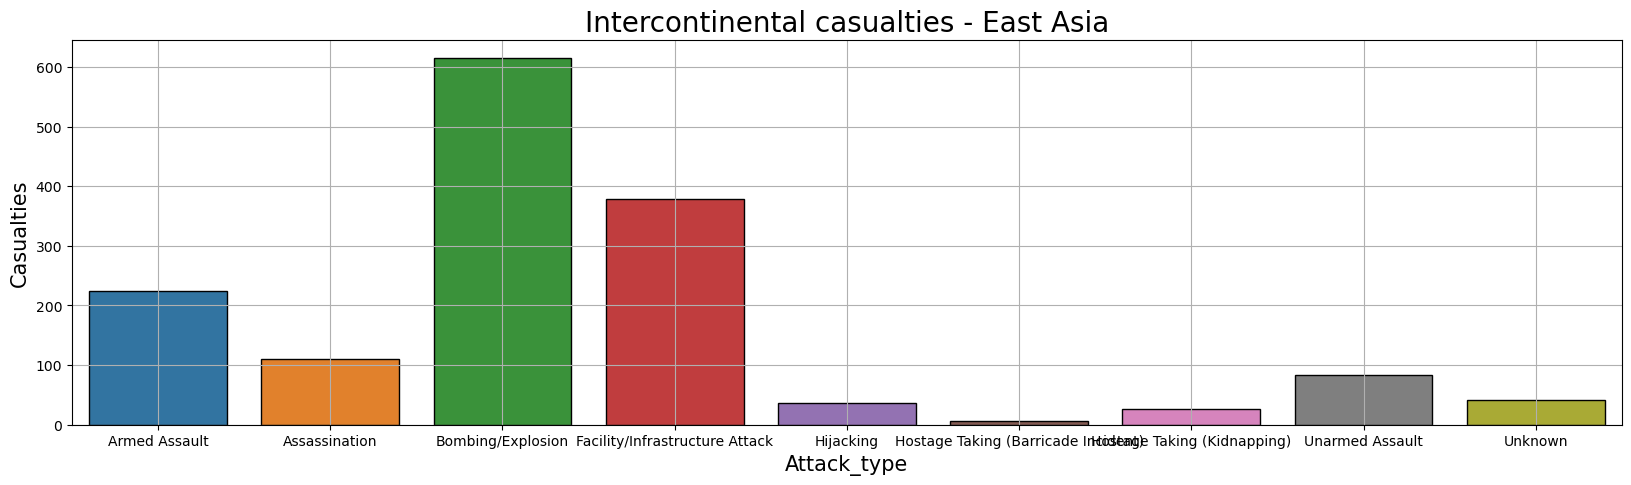

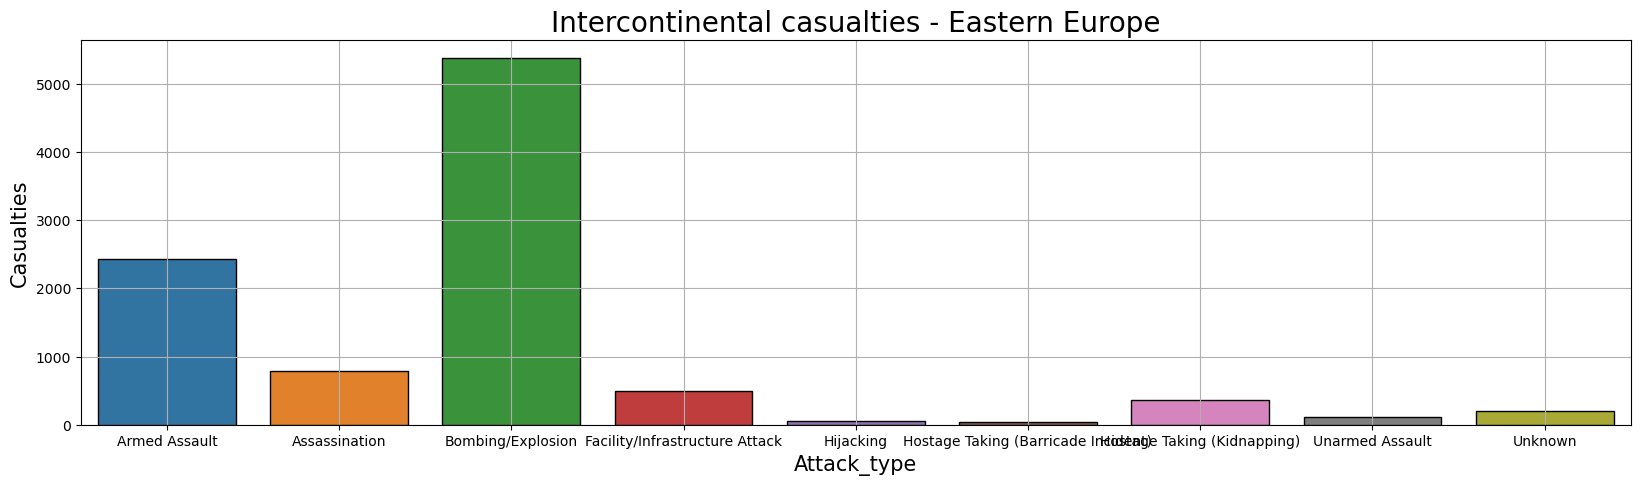

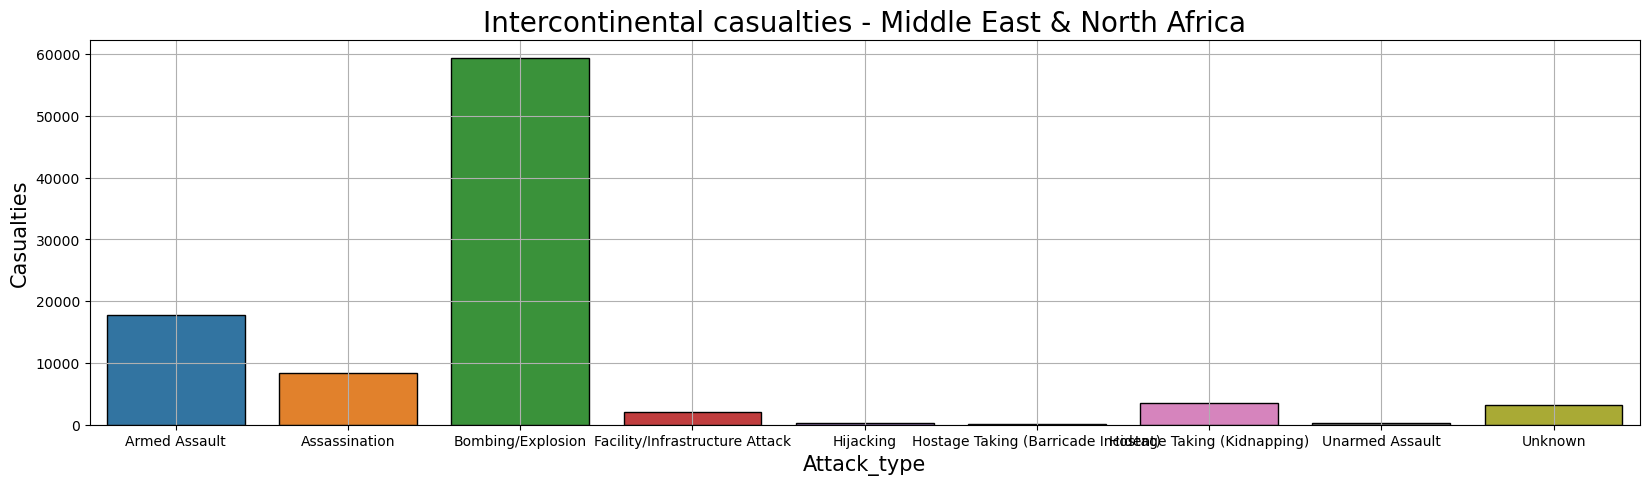

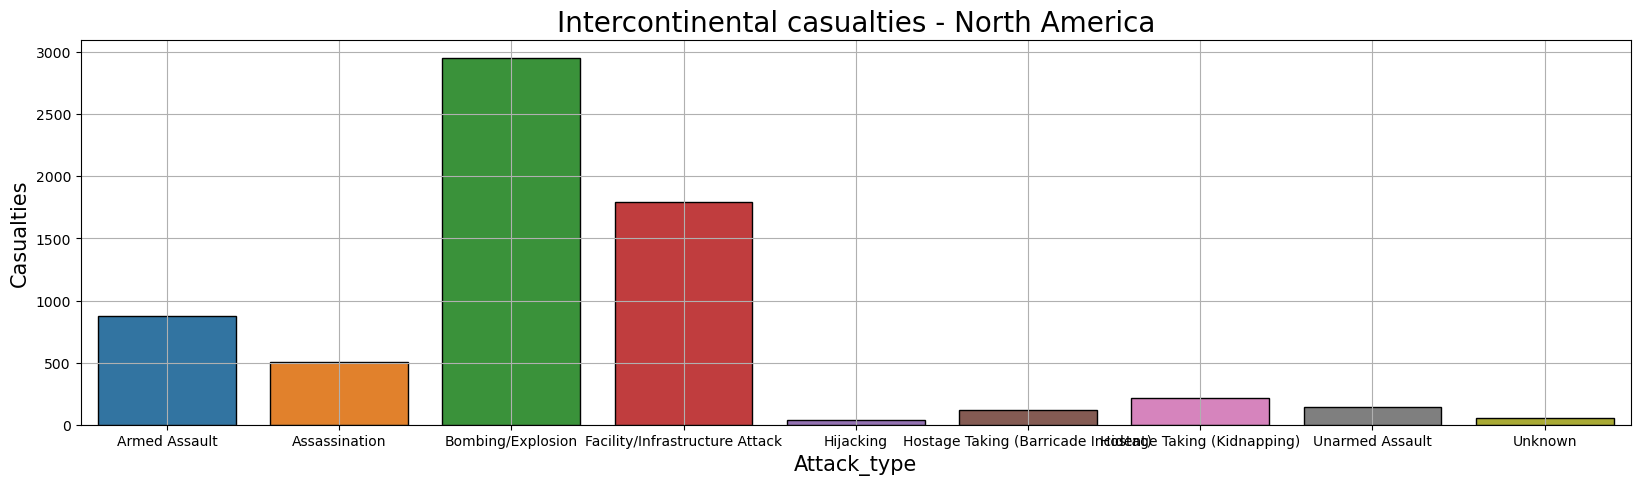

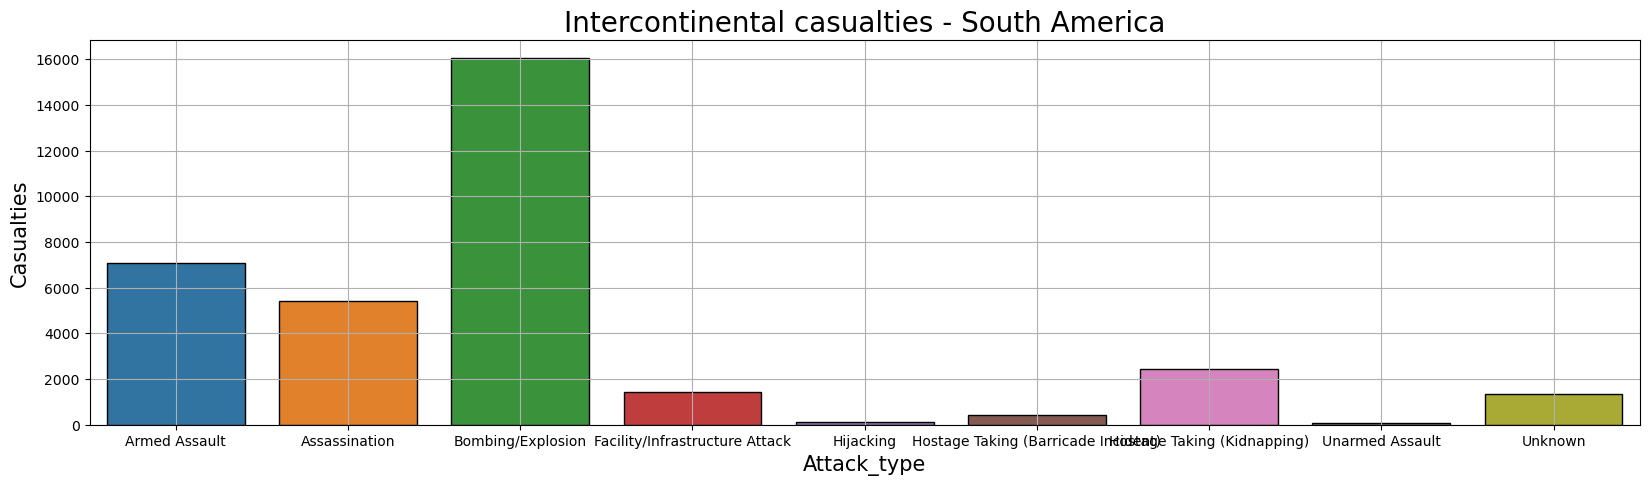

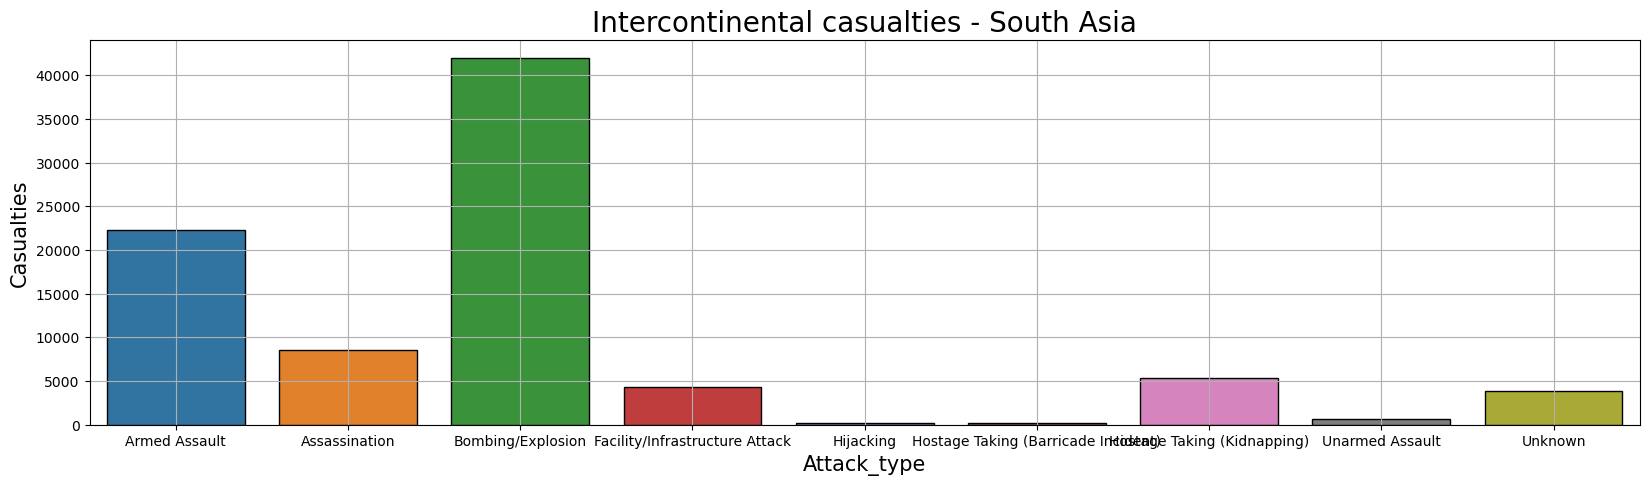

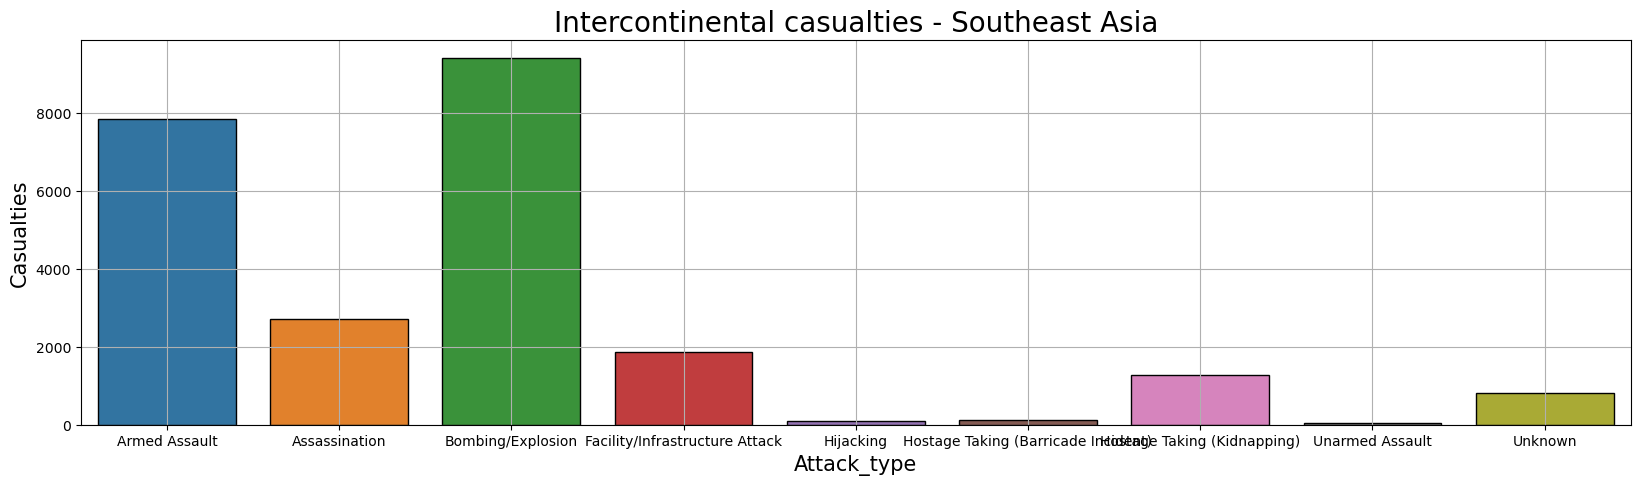

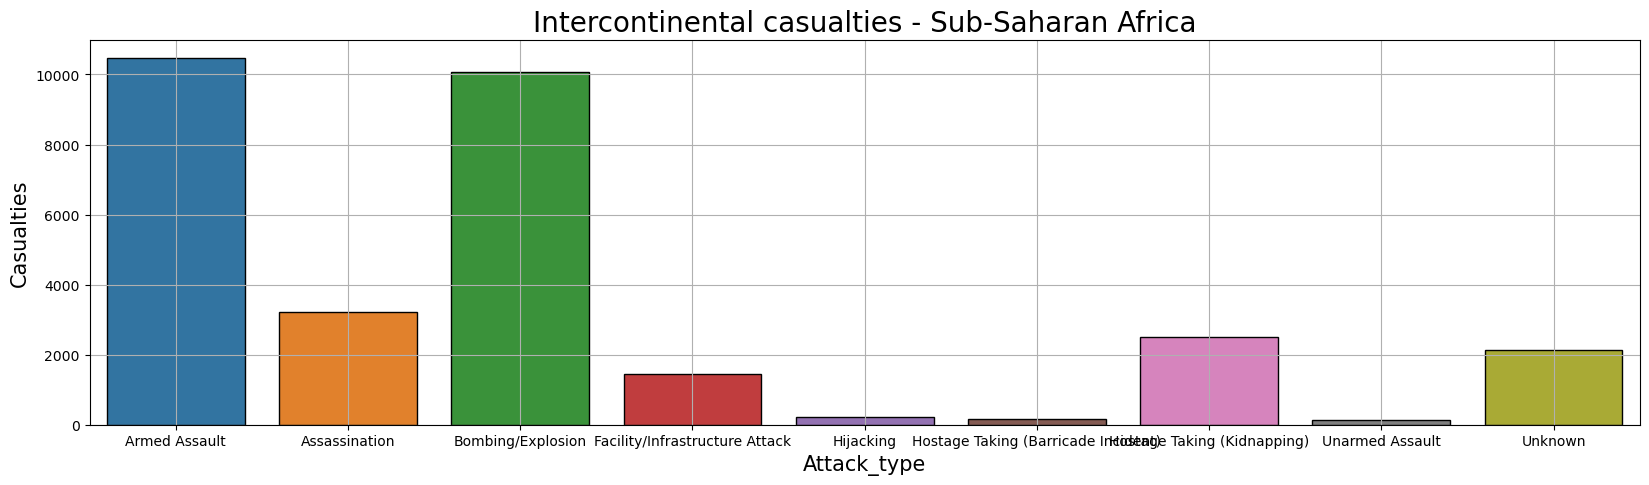

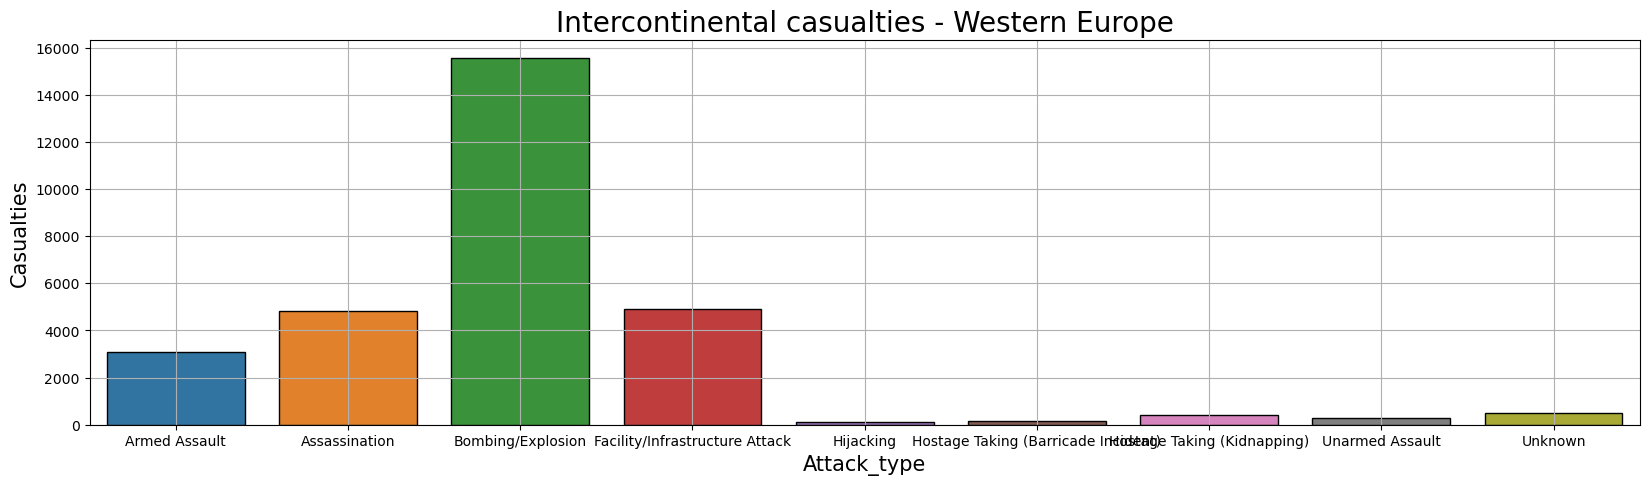

In [68]:
# 문제4
# 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여
# 각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하세요
# 여러분들은 데이터를 충분히 관찰하며서 신중하게 결과를 정리하세요
df_terror_region = df_terror.groupby(["region_txt", "attacktype1_txt"]).count().reset_index()
df_terror_region['casualties'] = df_terror_region['nkill'] + df_terror_region['nwound']
step4 = df_terror_region[['region_txt', 'attacktype1_txt', 'nkill', 'nwound', 'casualties']]
print(step4['attacktype1_txt'])
continent_list = step4.drop_duplicates(subset='region_txt')
continent_list = continent_list.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])

continents = []
for continent in continent_list['region_txt']:
    continents.append(continent)
    
for continent in continents:
    plt.figure(figsize=(20,5))
    sns.barplot(data=step4[step4['region_txt'] == continent], x='attacktype1_txt',y='casualties',ec='black',lw=1)
    plt.grid(True)
    plt.title('Intercontinental casualties - ' + continent,fontsize=20)
    plt.xlabel('Attack_type',fontsize=15)
    plt.ylabel('Casualties',fontsize=15)
    plt.show()

['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
['Central America & Caribbean', 'Eastern Europe', 'Middle East & North Africa', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']


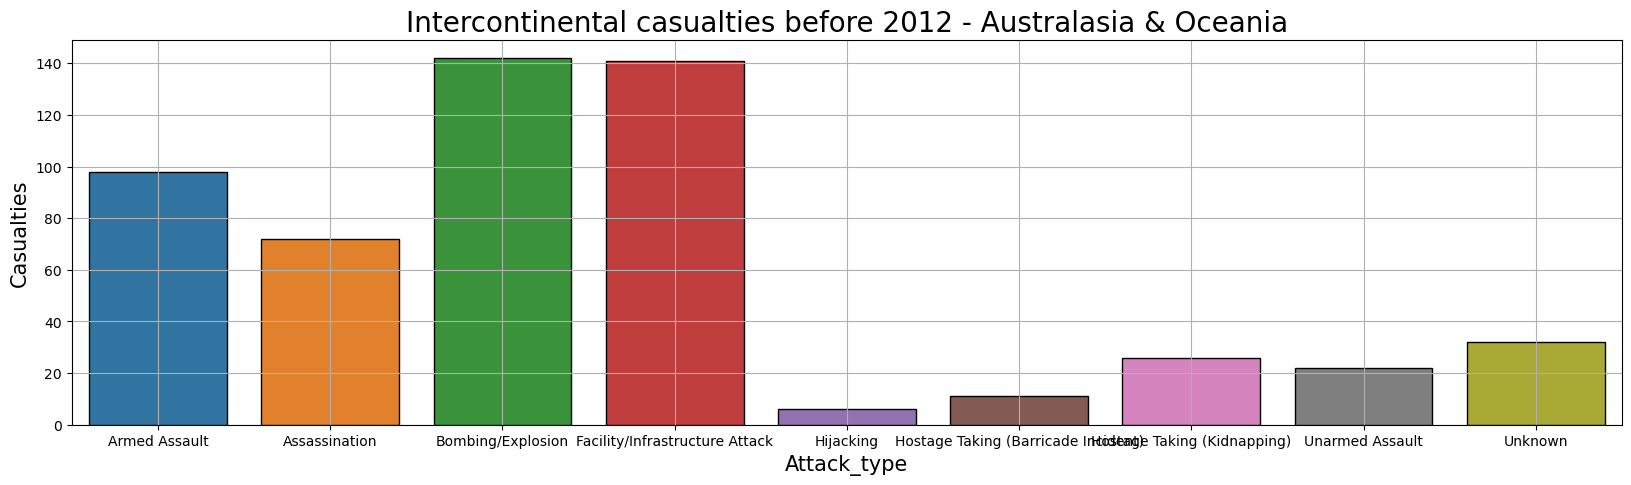

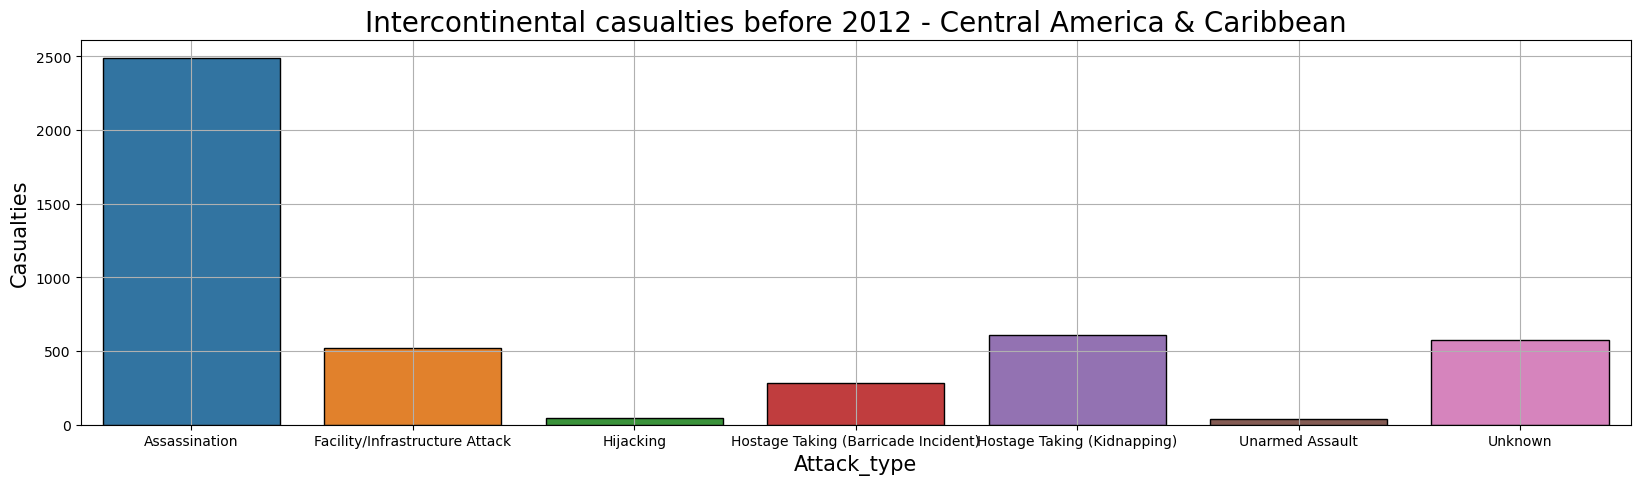

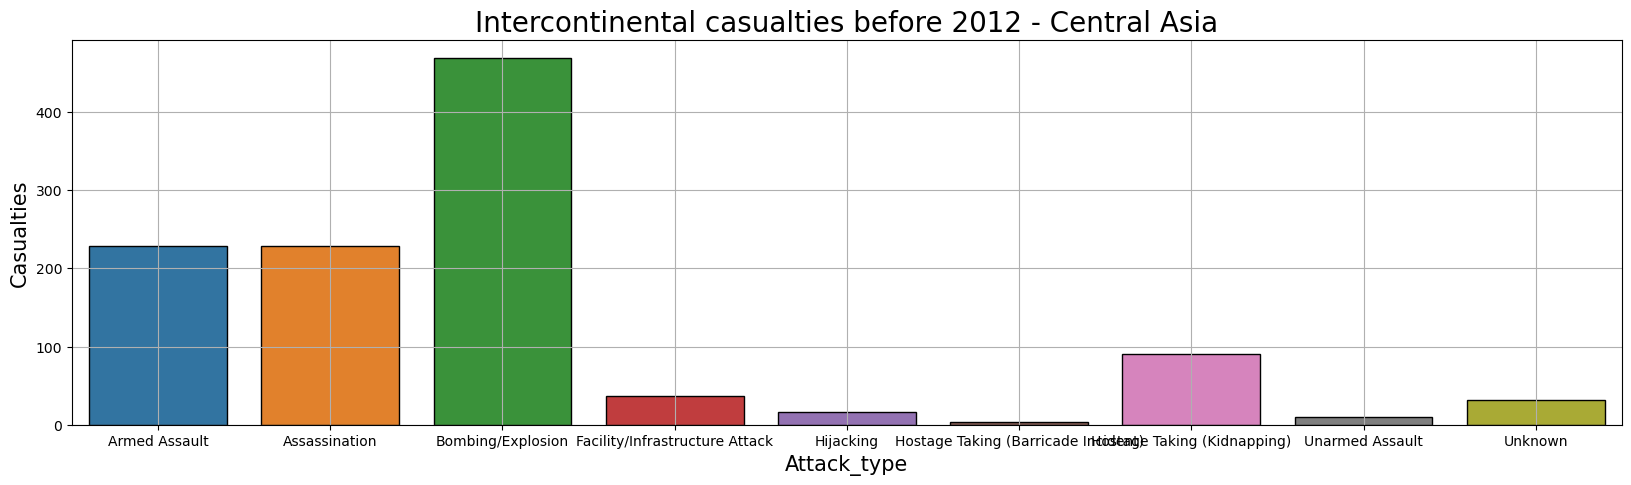

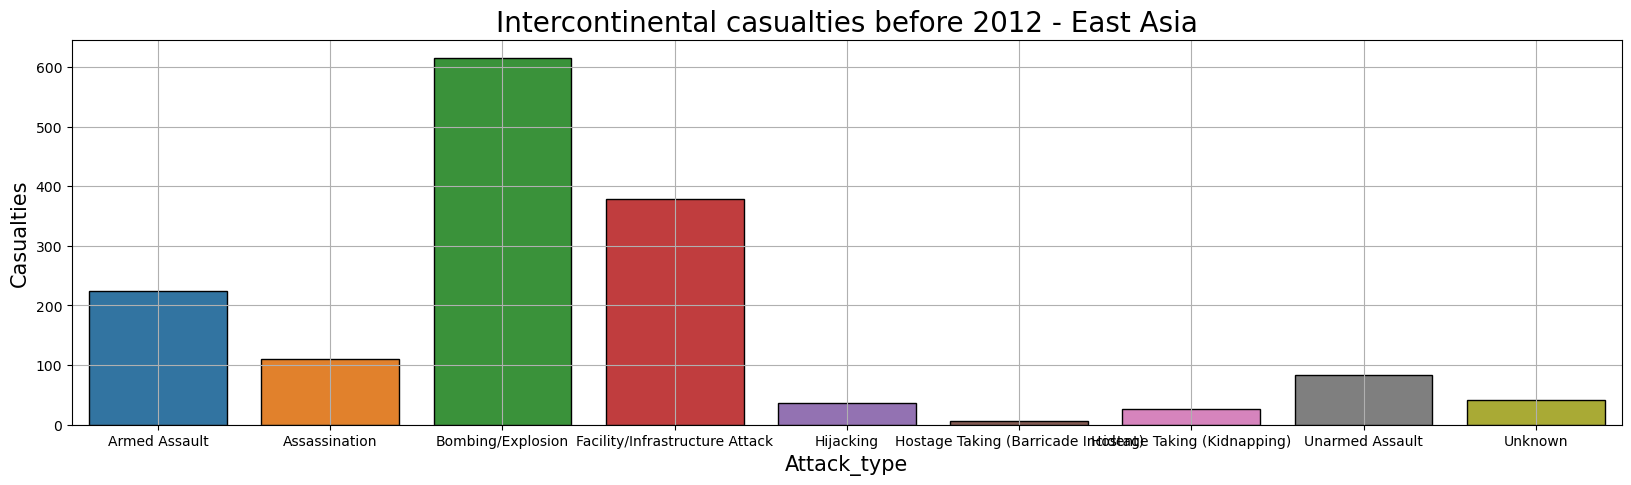

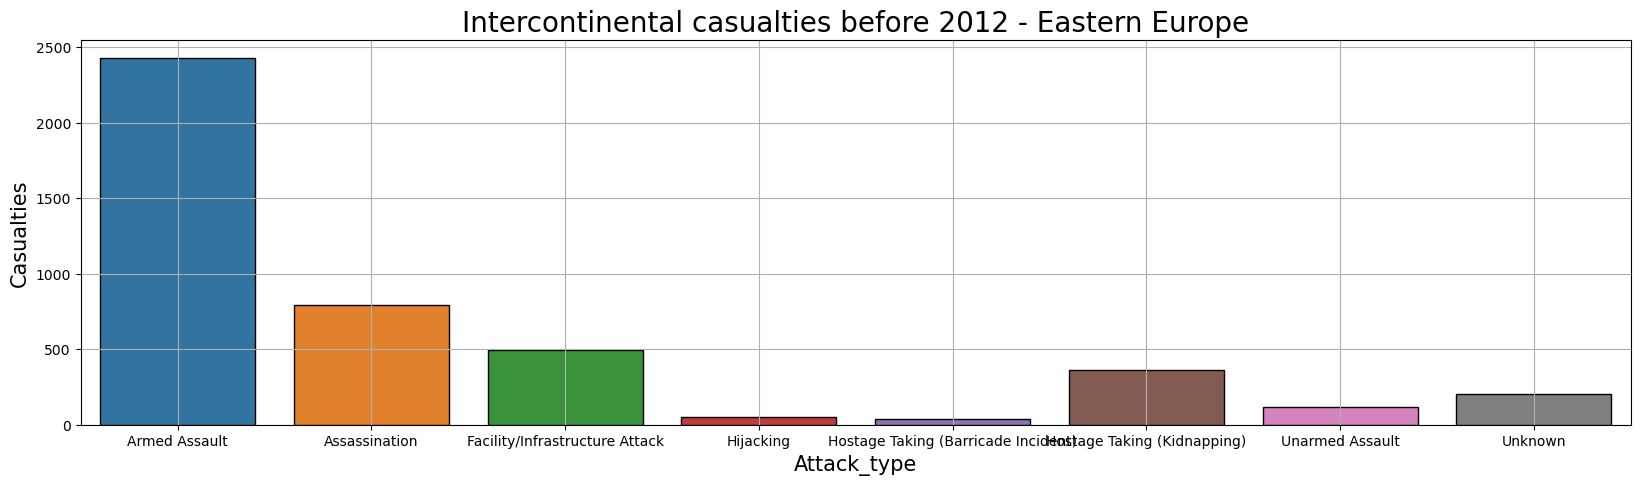

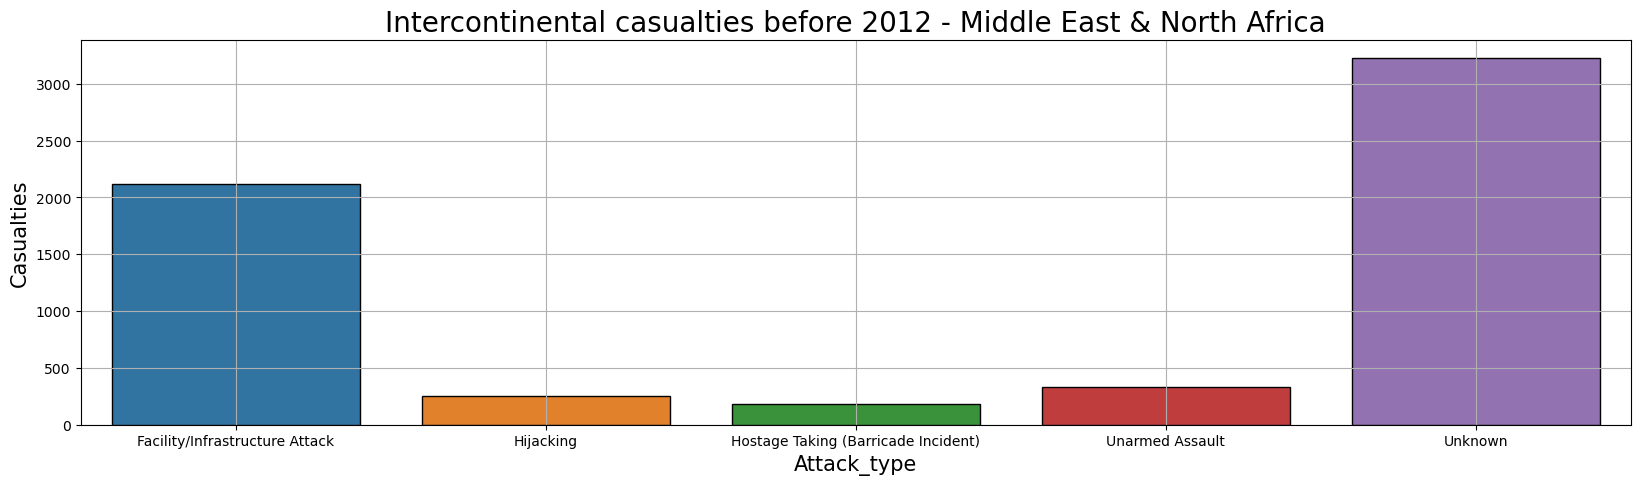

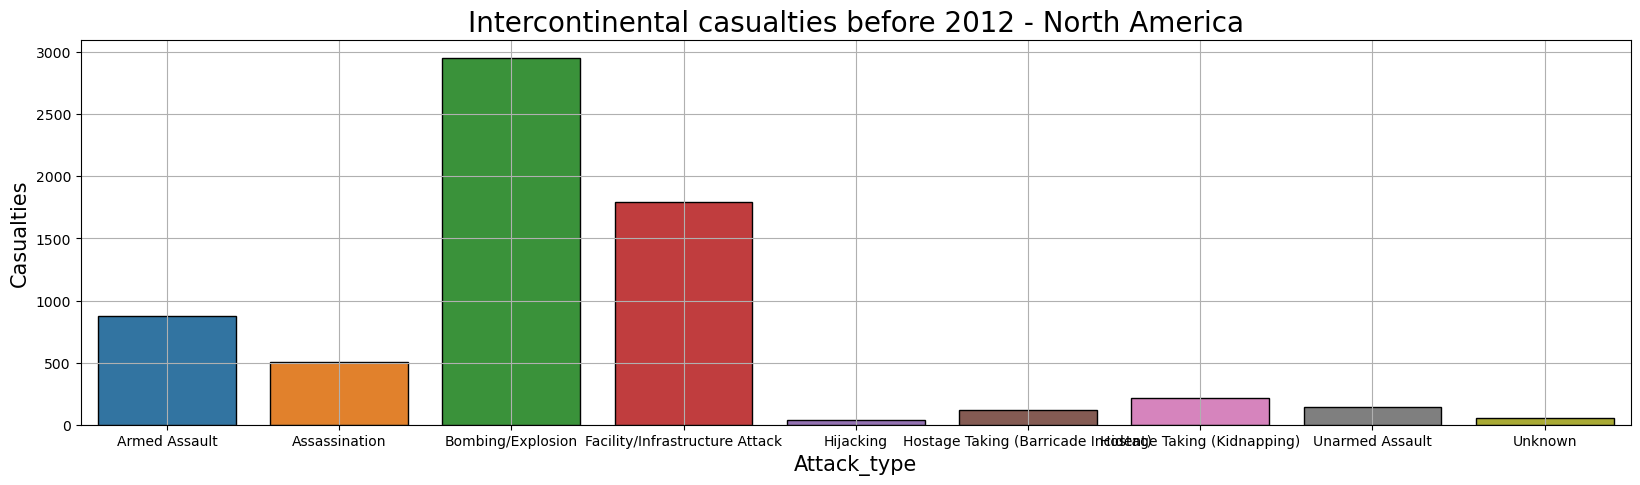

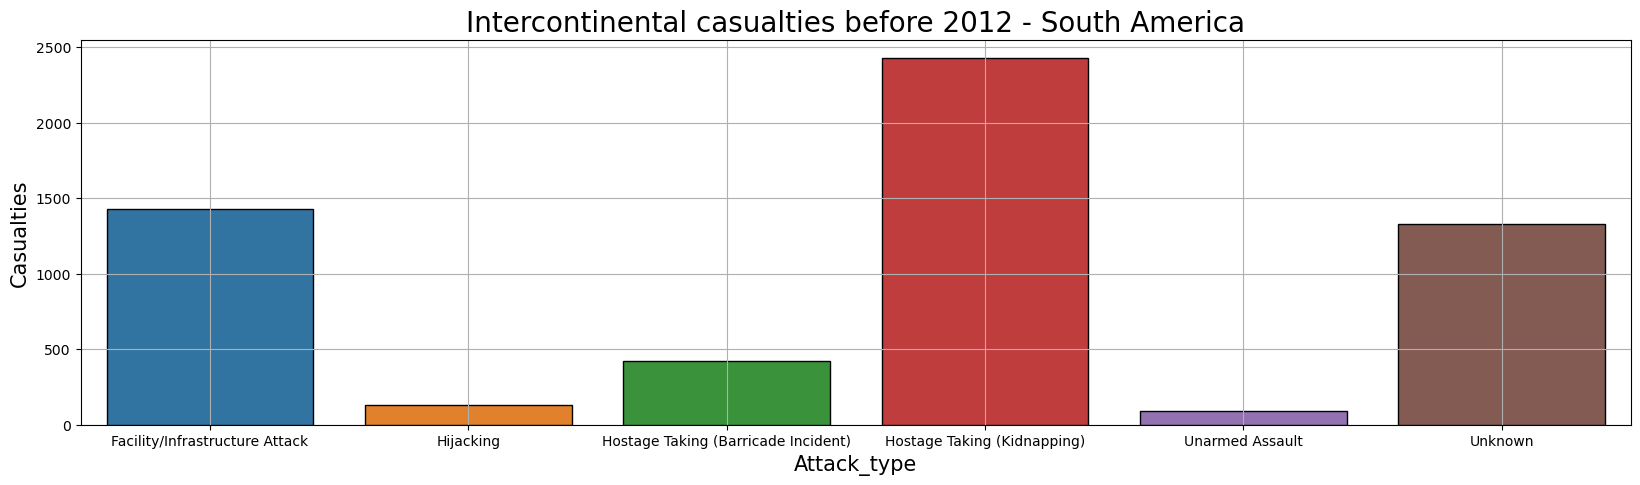

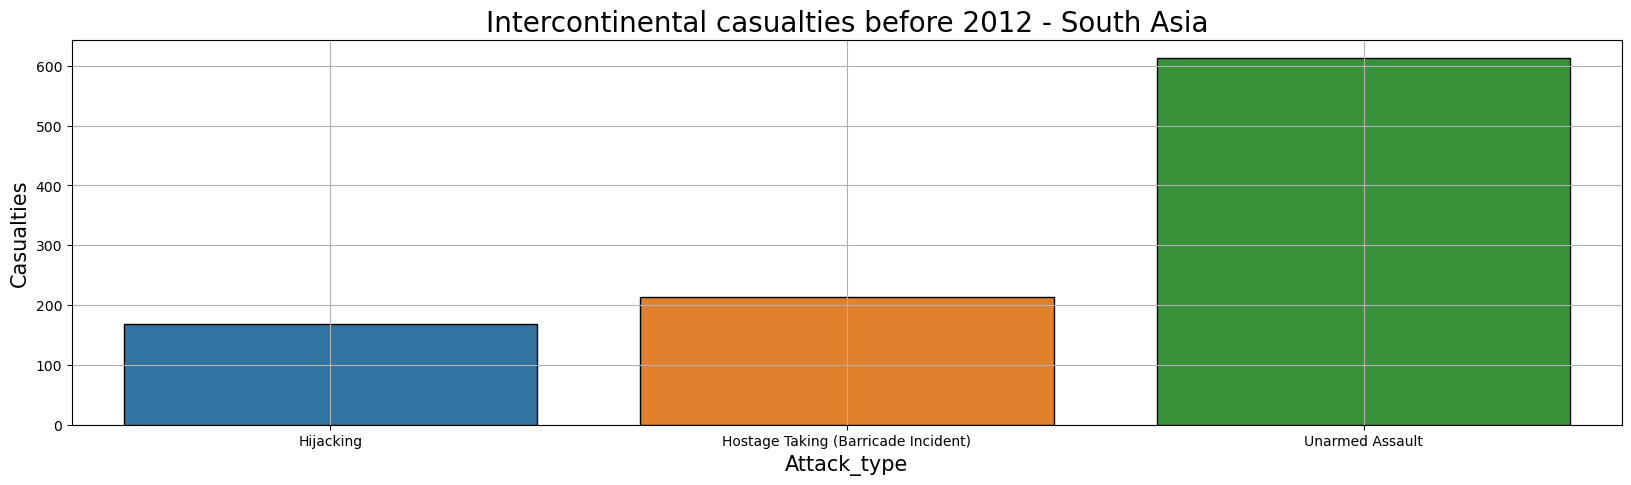

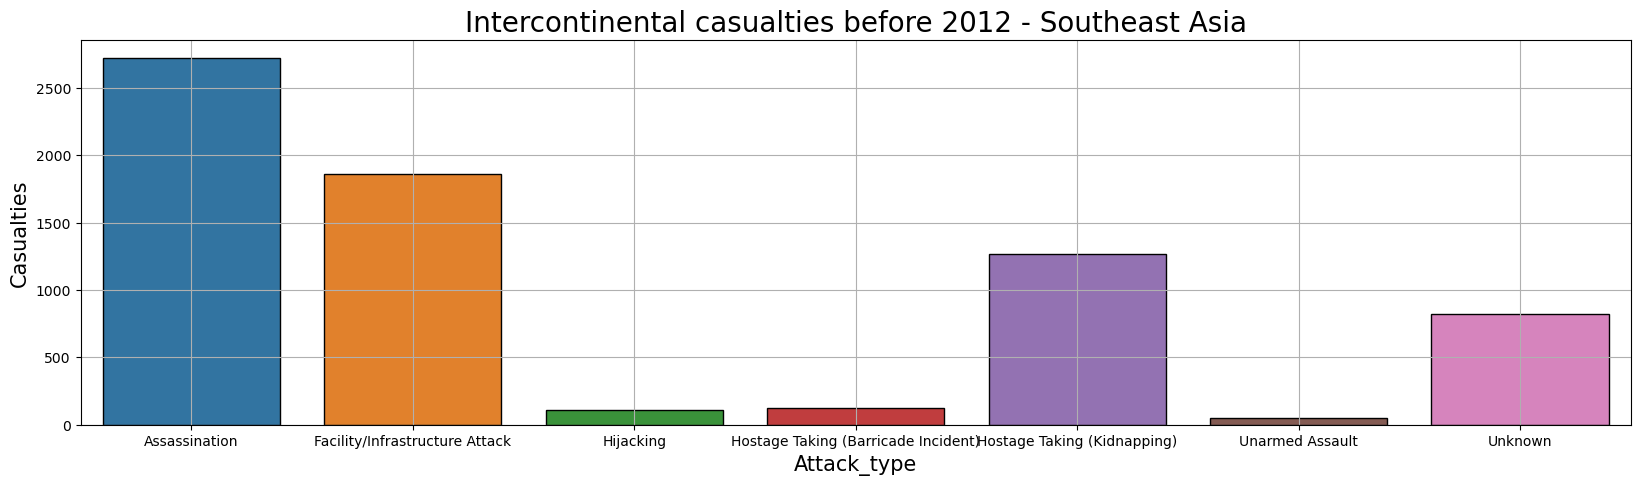

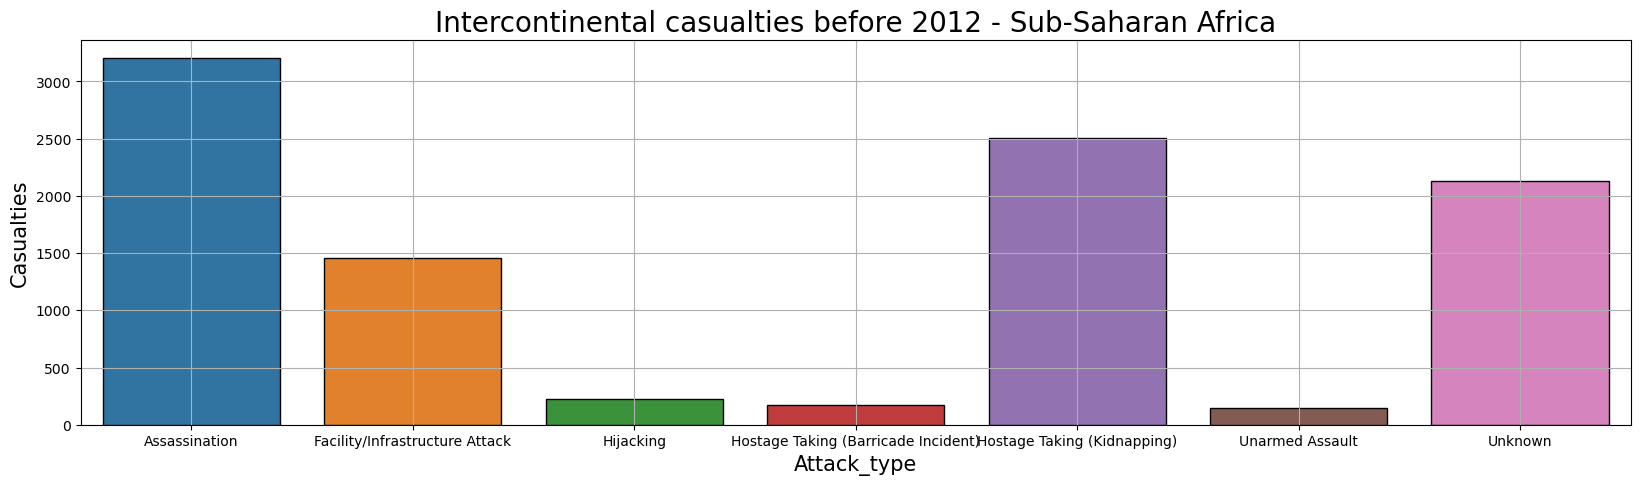

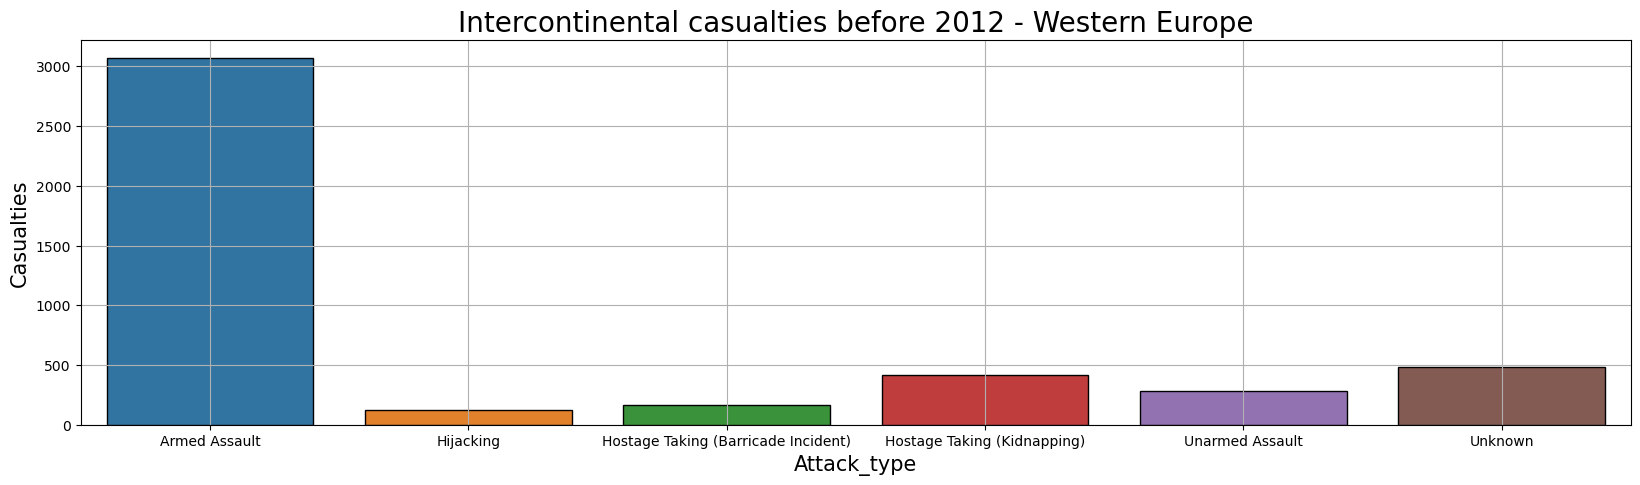

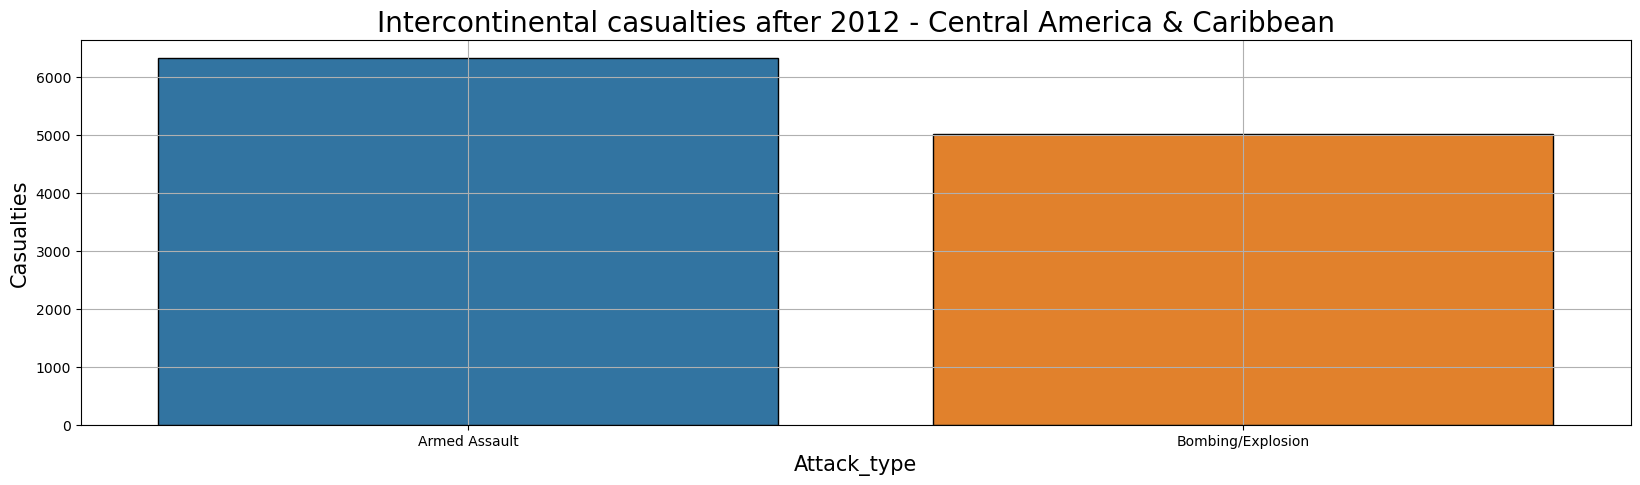

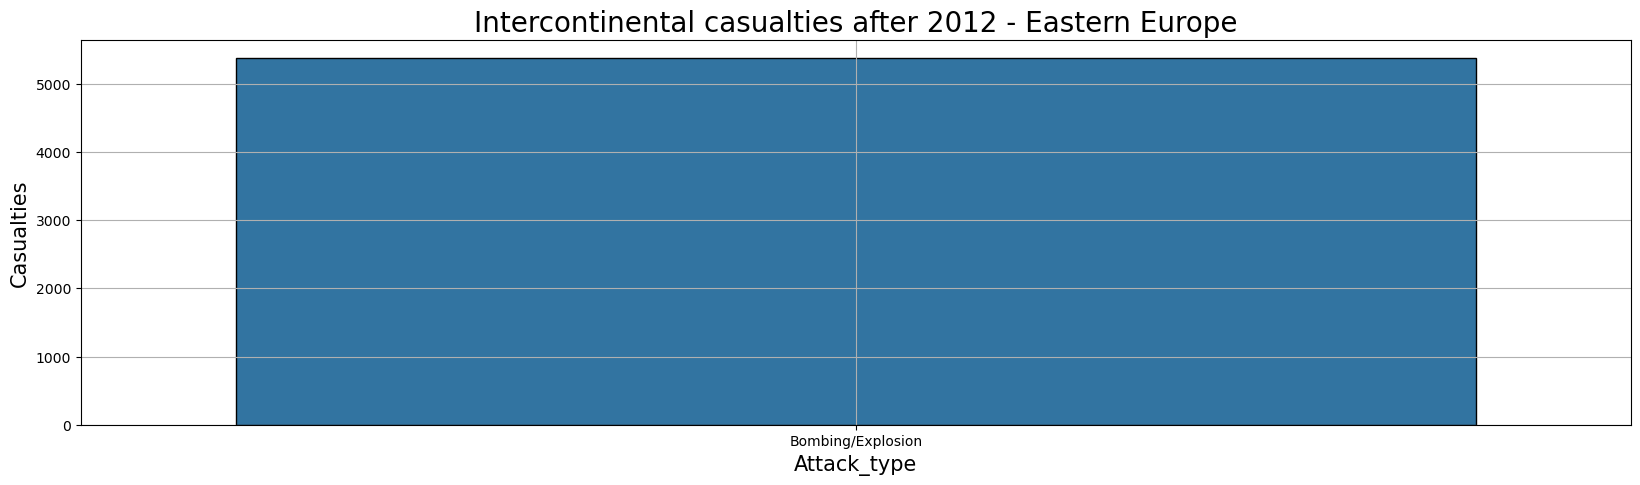

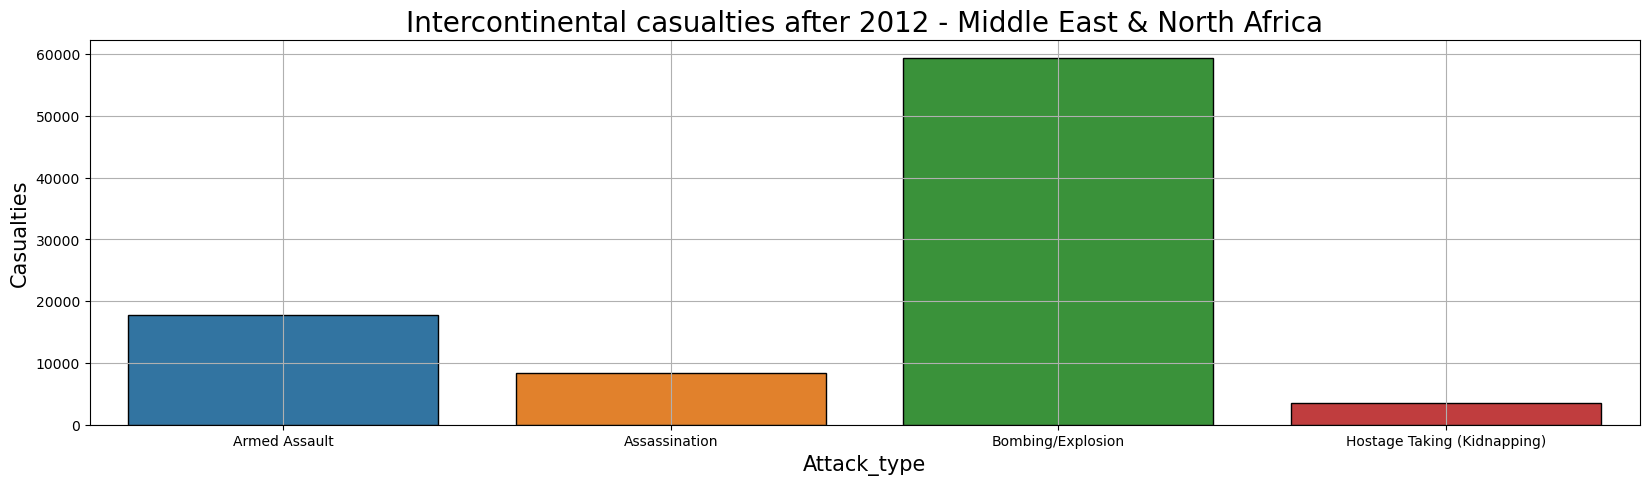

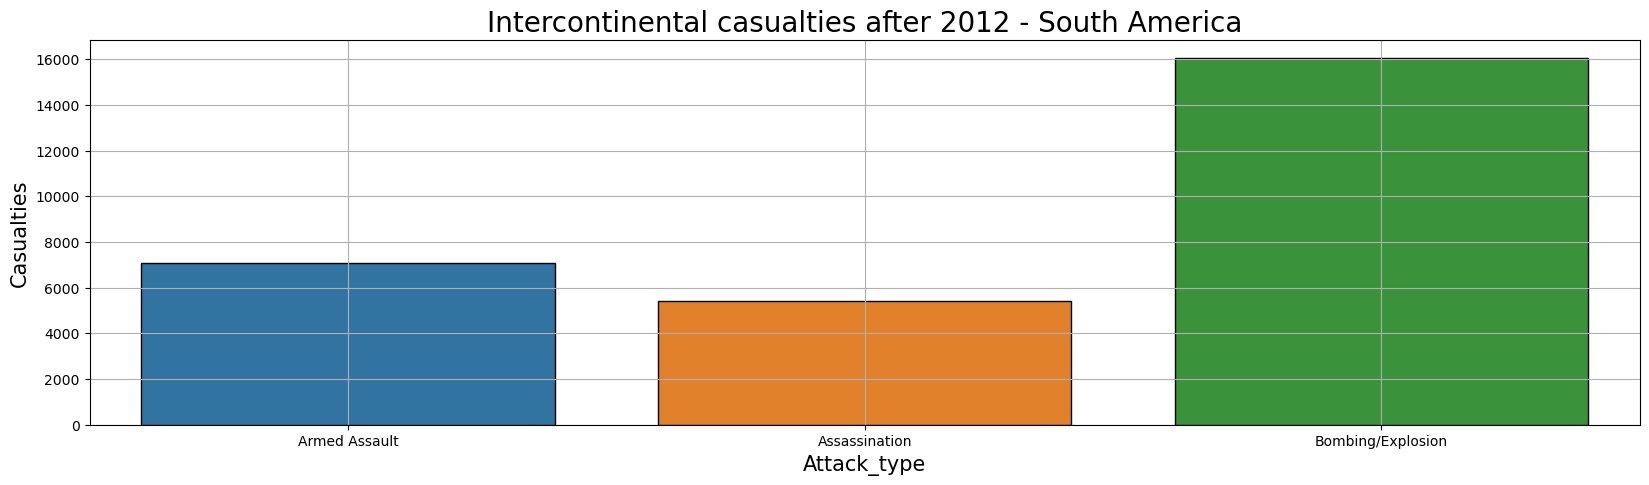

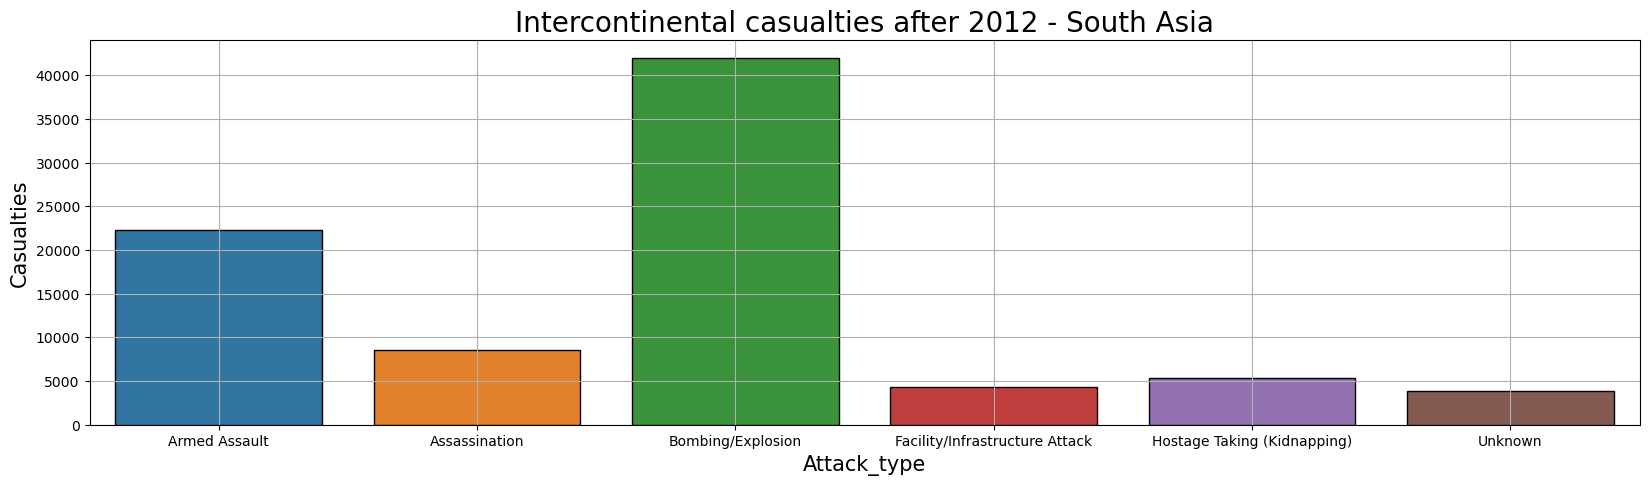

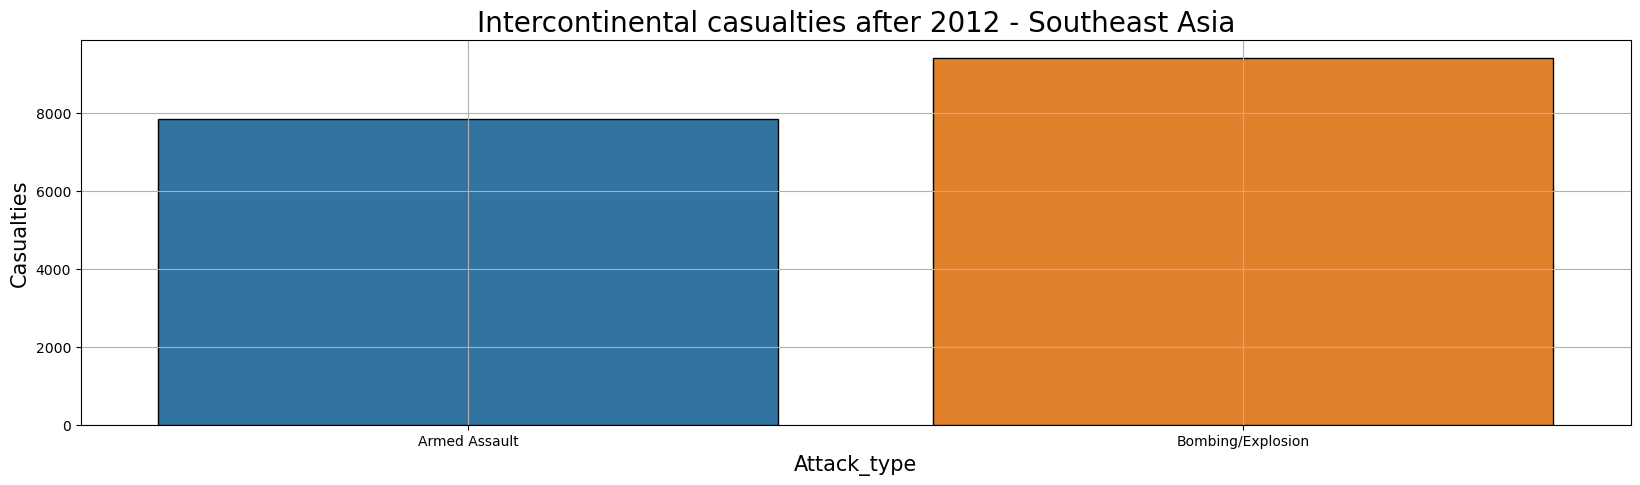

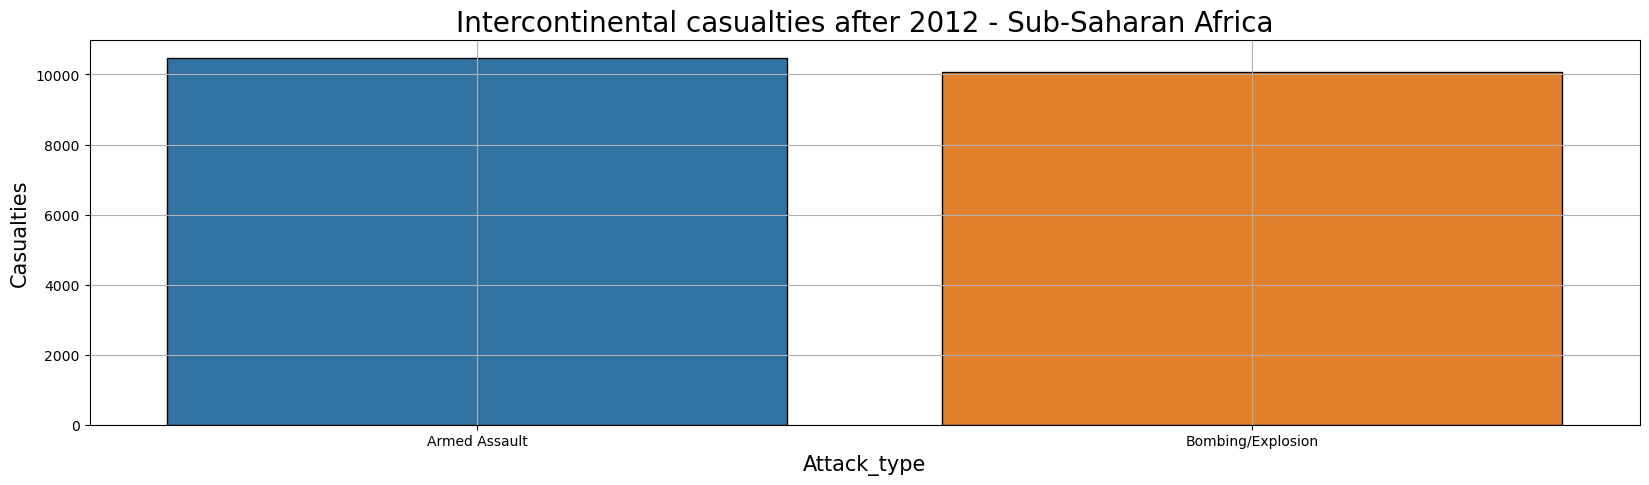

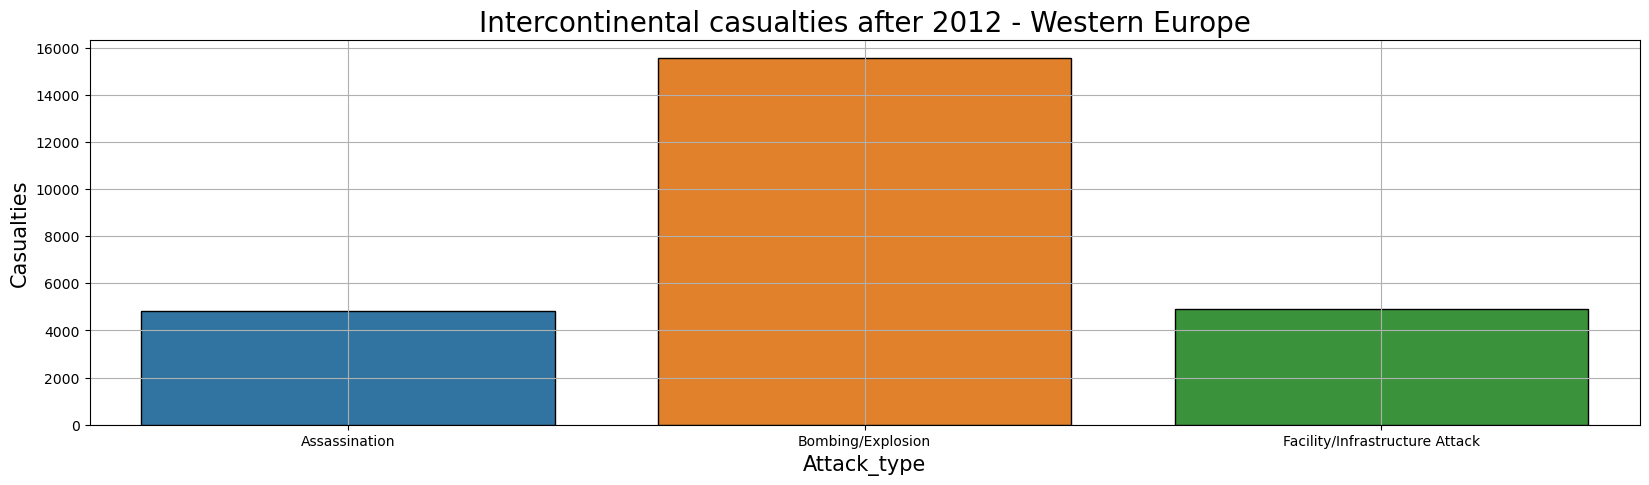

In [93]:
# 문제 5
# 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해
# 문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.
# 그리고 본인의 분석결과를 제시하시오
step5_before_2012 = df_terror_region[df_terror_region['iyear'] < 2012]
step5_after_2012 = df_terror_region[df_terror_region['iyear'] >= 2012]
step5_before_2012 = step5_before_2012[['region_txt', 'attacktype1_txt', 'nkill', 'nwound', 'casualties']]
step5_after_2012 = step5_after_2012[['region_txt', 'attacktype1_txt', 'nkill', 'nwound', 'casualties']]

continent_list_before_2012 = step5_before_2012.drop_duplicates(subset='region_txt')
continent_list_before_2012 = continent_list_before_2012.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])
continent_list_after_2012 = step5_after_2012.drop_duplicates(subset='region_txt')
continent_list_after_2012 = continent_list_after_2012.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])

continents_before_2012 = []
for continent in continent_list_before_2012['region_txt']:
    continents_before_2012.append(continent)
continents_after_2012 = []
for continent in continent_list_after_2012['region_txt']:
    continents_after_2012.append(continent)
    
print(continents_before_2012)
print(continents_after_2012)

for continent in continents_before_2012:
    plt.figure(figsize=(20,5))
    sns.barplot(data=step5_before_2012[step5_before_2012['region_txt'] == continent], x='attacktype1_txt',y='casualties',ec='black',lw=1)
    plt.grid(True)
    plt.title('Intercontinental casualties before 2012 - ' + continent,fontsize=20)
    plt.xlabel('Attack_type',fontsize=15)
    plt.ylabel('Casualties',fontsize=15)
    plt.show()
    
for continent in continents_after_2012:
    plt.figure(figsize=(20,5))
    sns.barplot(data=step5_after_2012[step5_after_2012['region_txt'] == continent], x='attacktype1_txt',y='casualties',ec='black',lw=1)
    plt.grid(True)
    plt.title('Intercontinental casualties after 2012 - ' + continent,fontsize=20)
    plt.xlabel('Attack_type',fontsize=15)
    plt.ylabel('Casualties',fontsize=15)
    plt.show()

# 분석 결과
### 2012년 이전과 이후로 테러횟수의 차이가 크게 벌어졌고, 테러의 방식은 다양한 방식에서 주로 무장공격/폭발로 단순화되었음.
### 또한, 2012년 이전에는 총 12개의 대륙 카테고리에서 테러가 일어났지만, 2012년 이후에는 8개 대륙 카테고리에서 테러가 발생함.
### 2012년 이전 대륙 리스트 : ['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan  Africa', 'Western Europe']
### 2012년 이후 대륙 리스트 : ['Central America & Caribbean', 'Eastern Europe', 'Middle East & North Africa', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
['Australasia & Oceania', 'Central Ameri

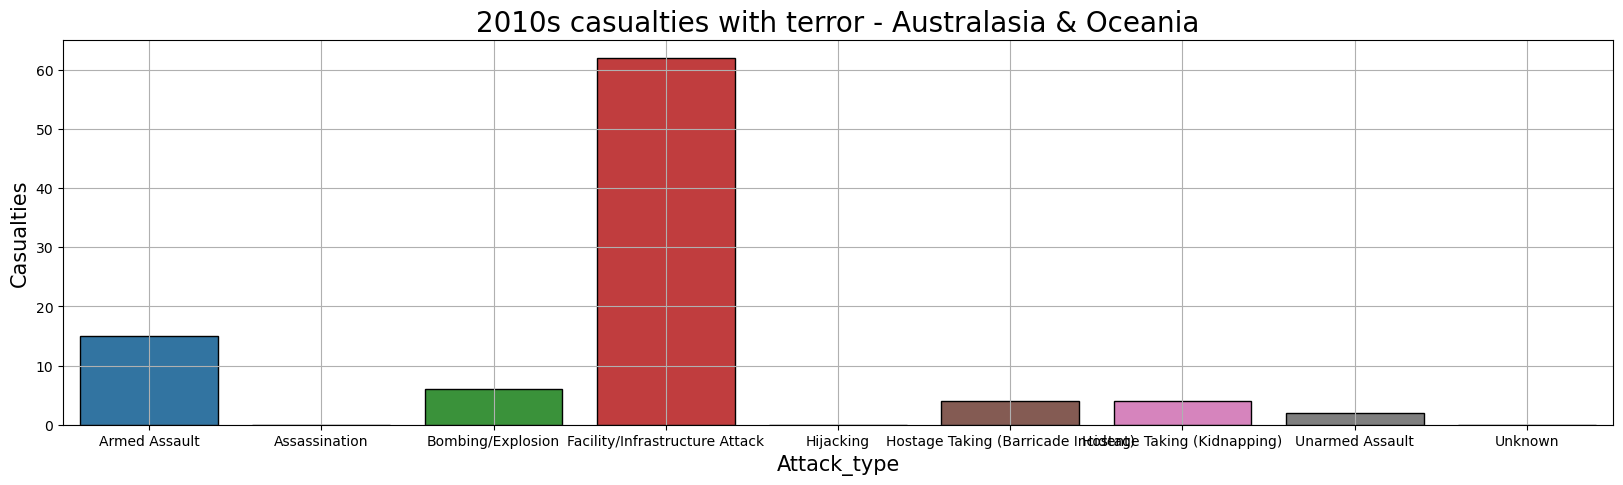

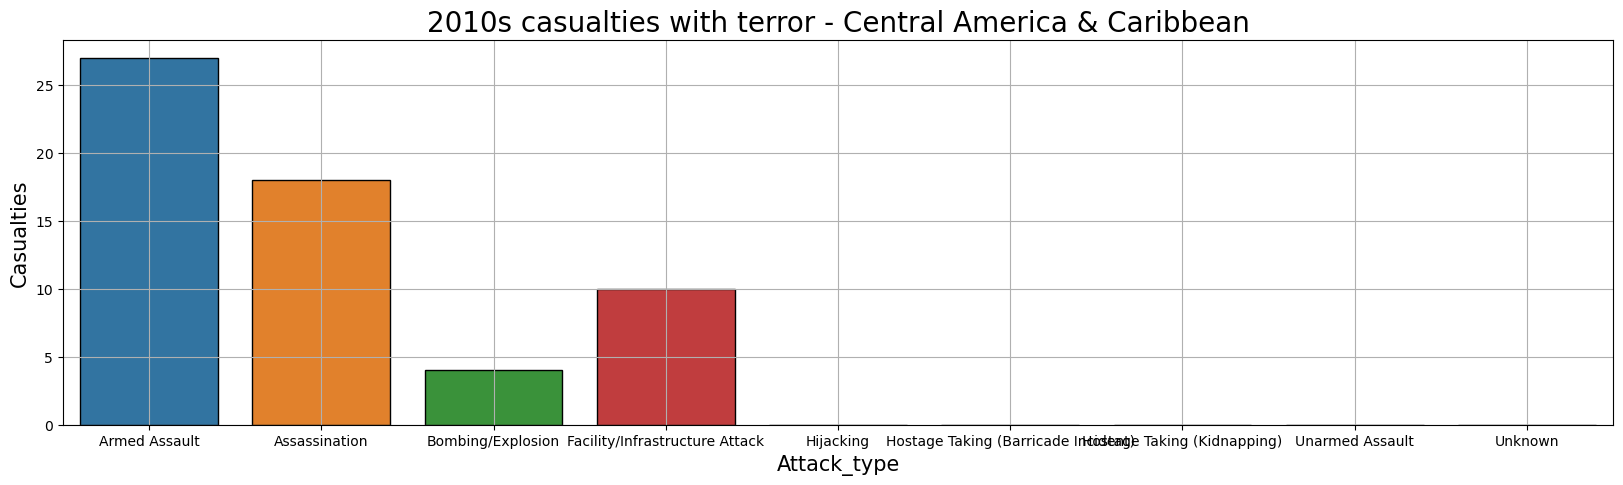

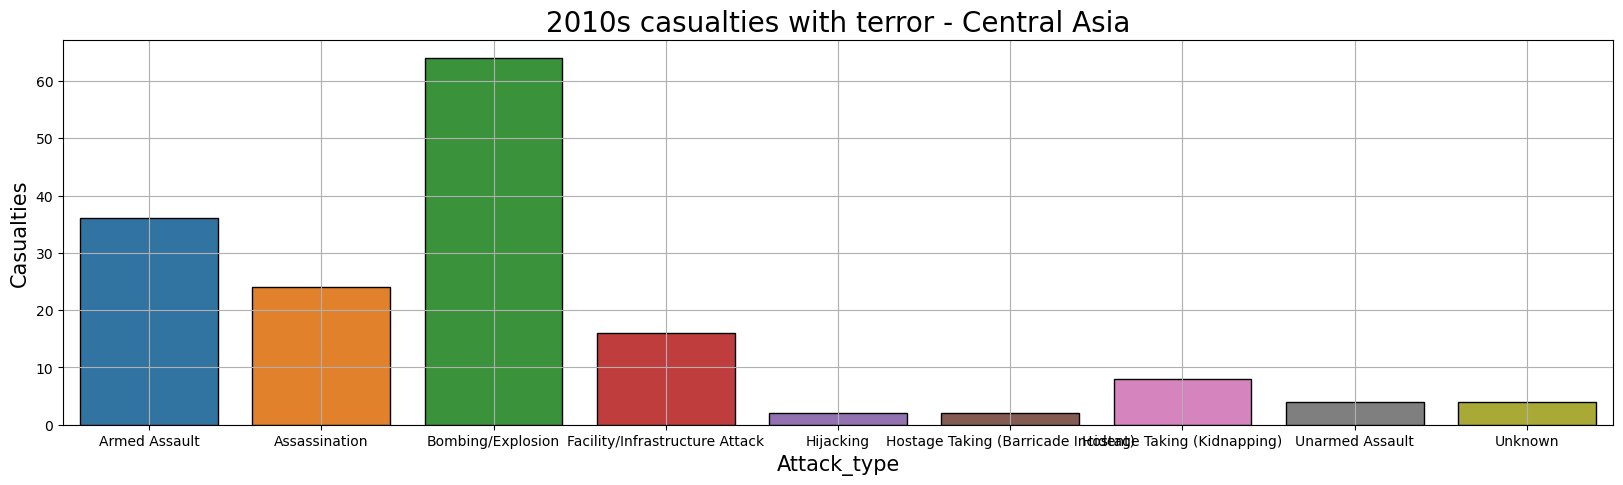

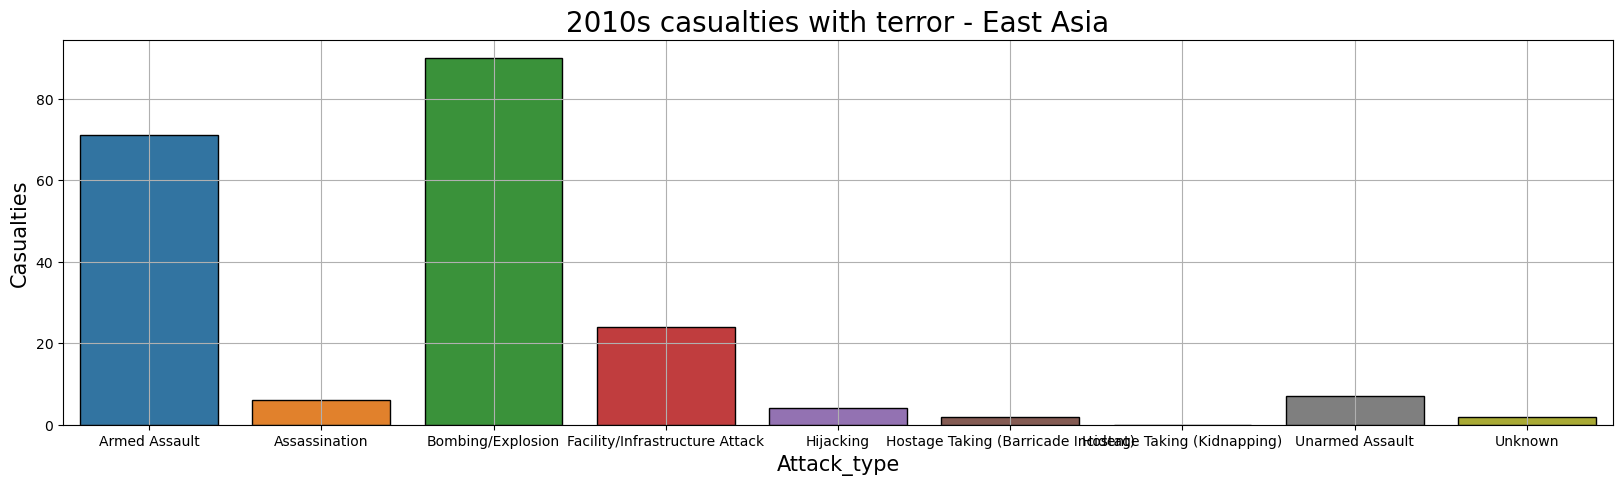

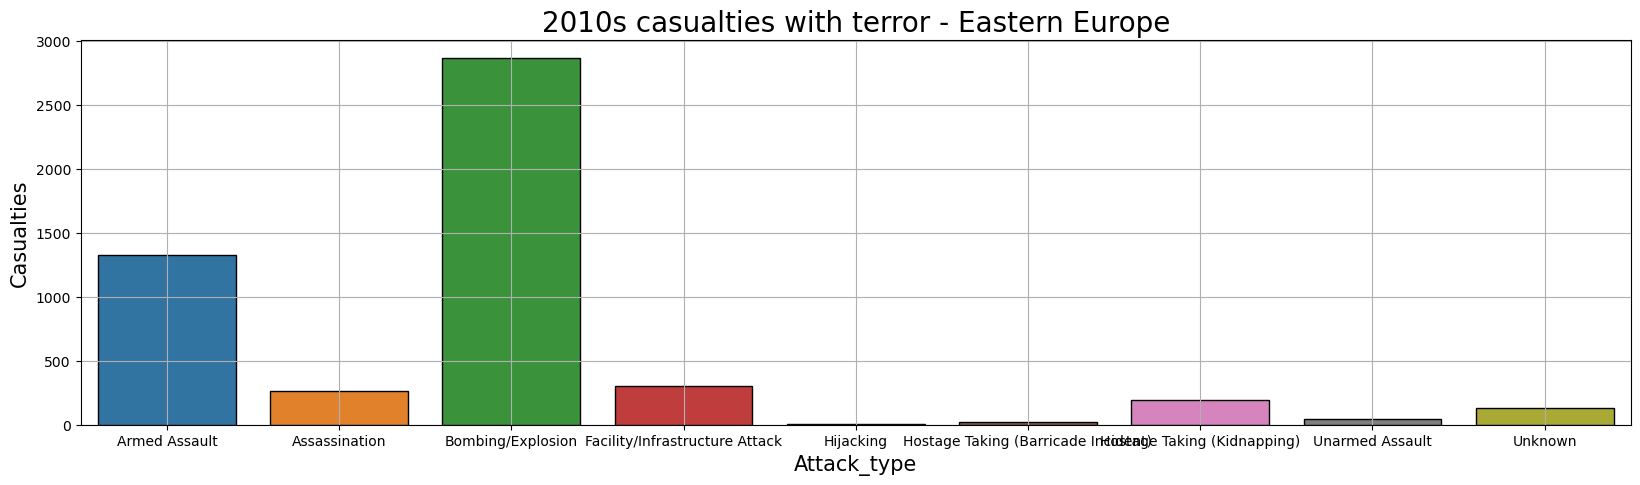

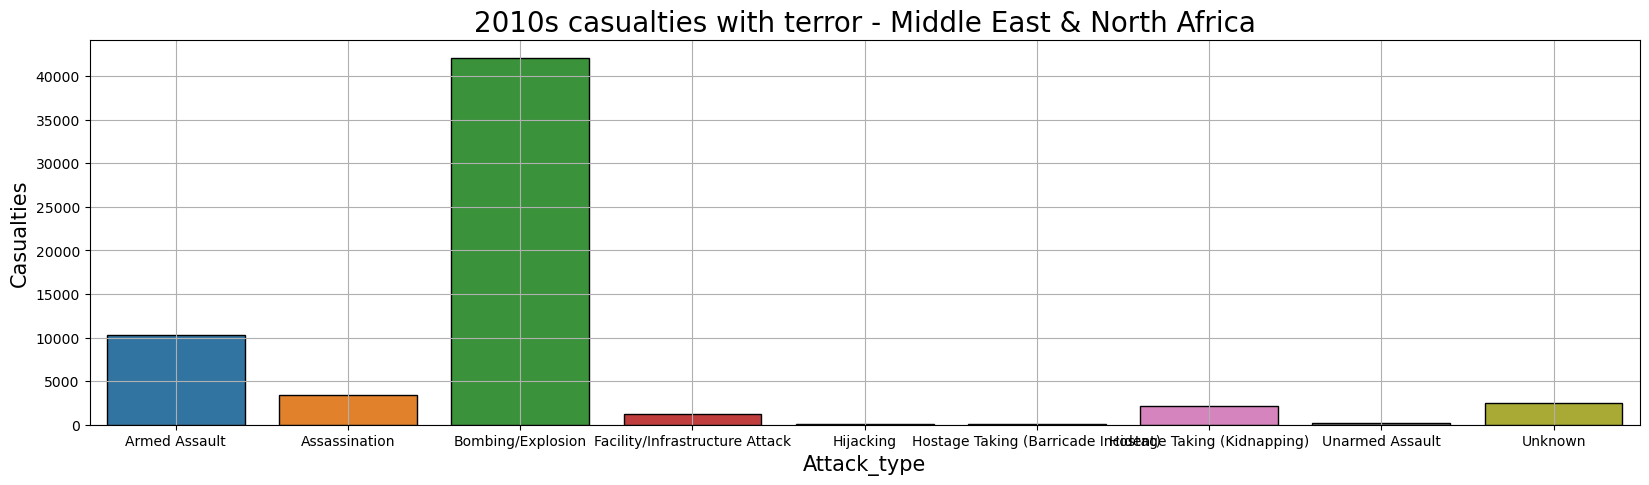

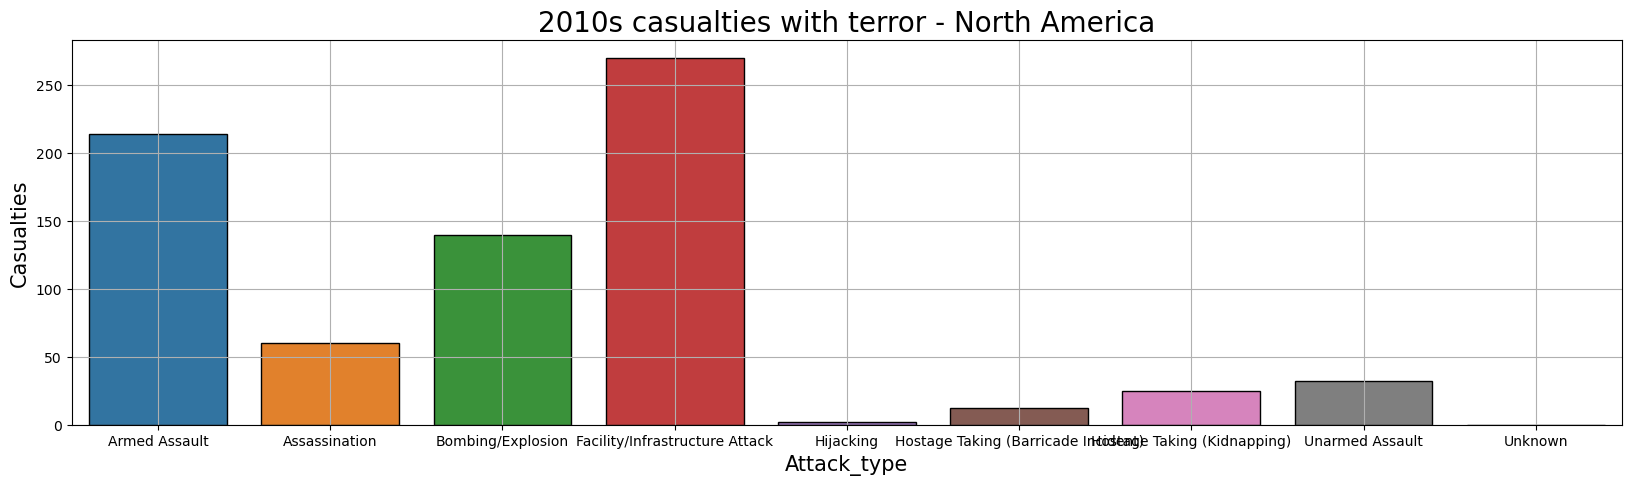

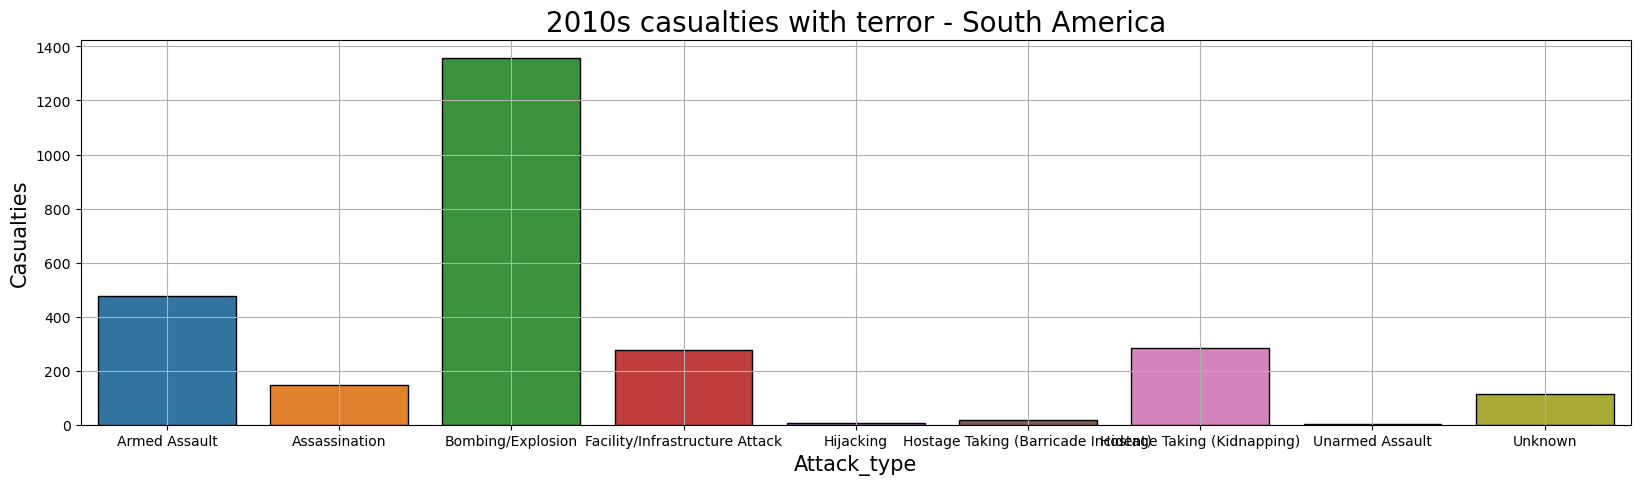

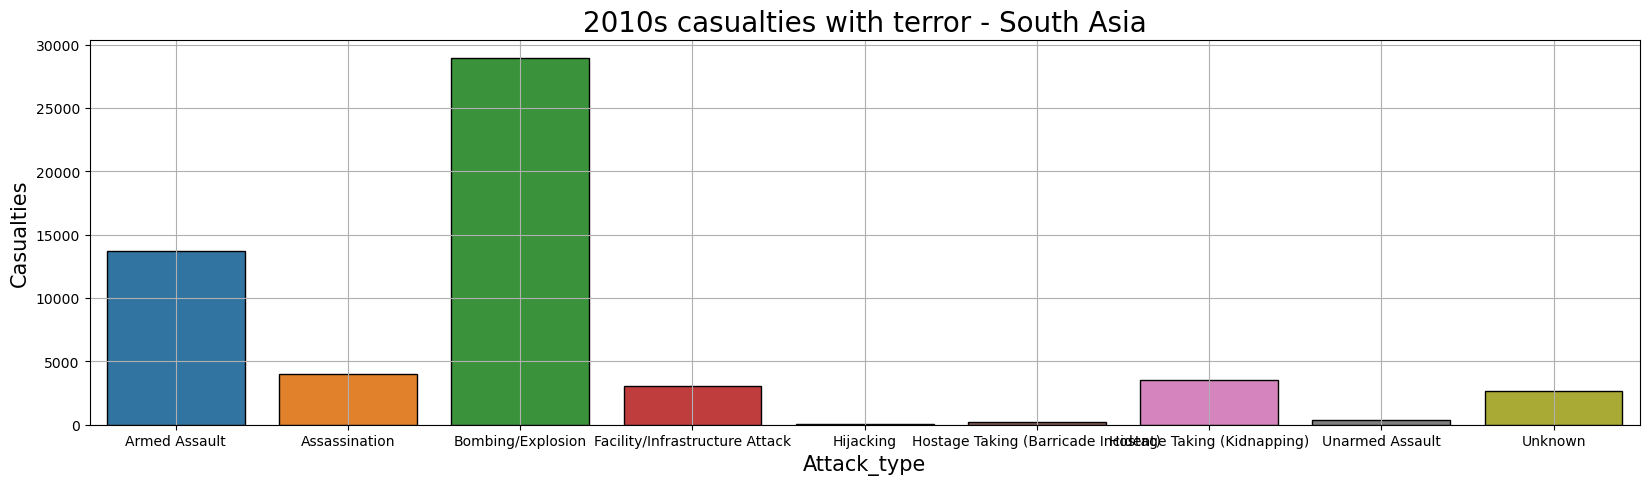

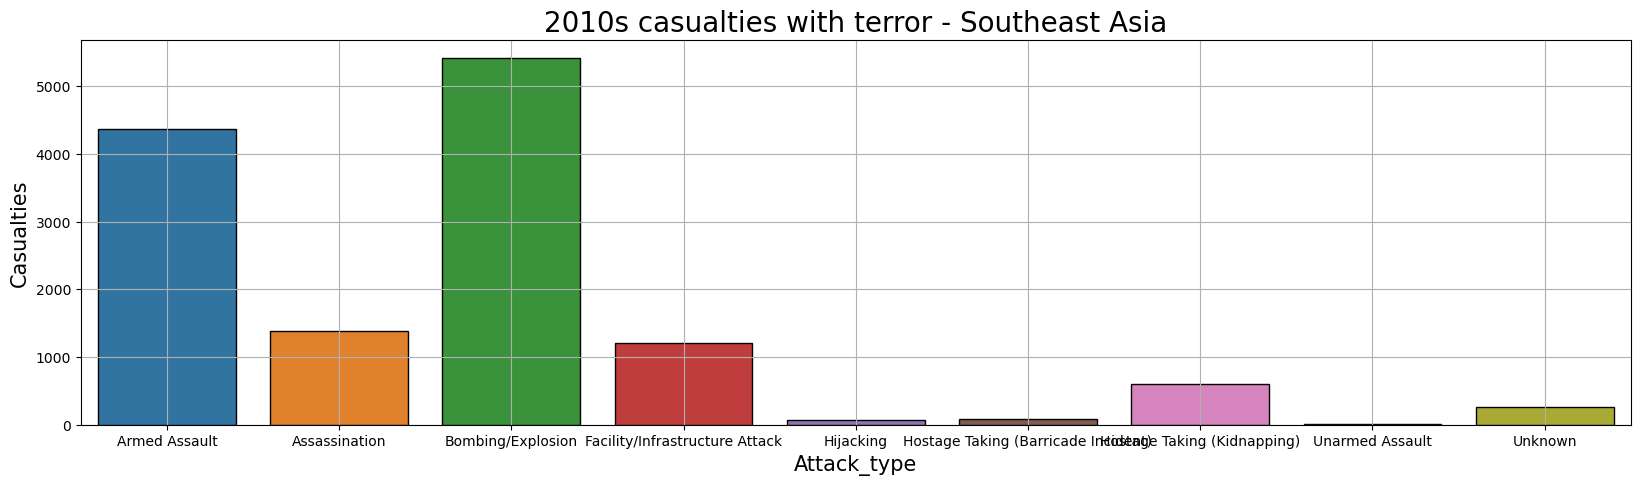

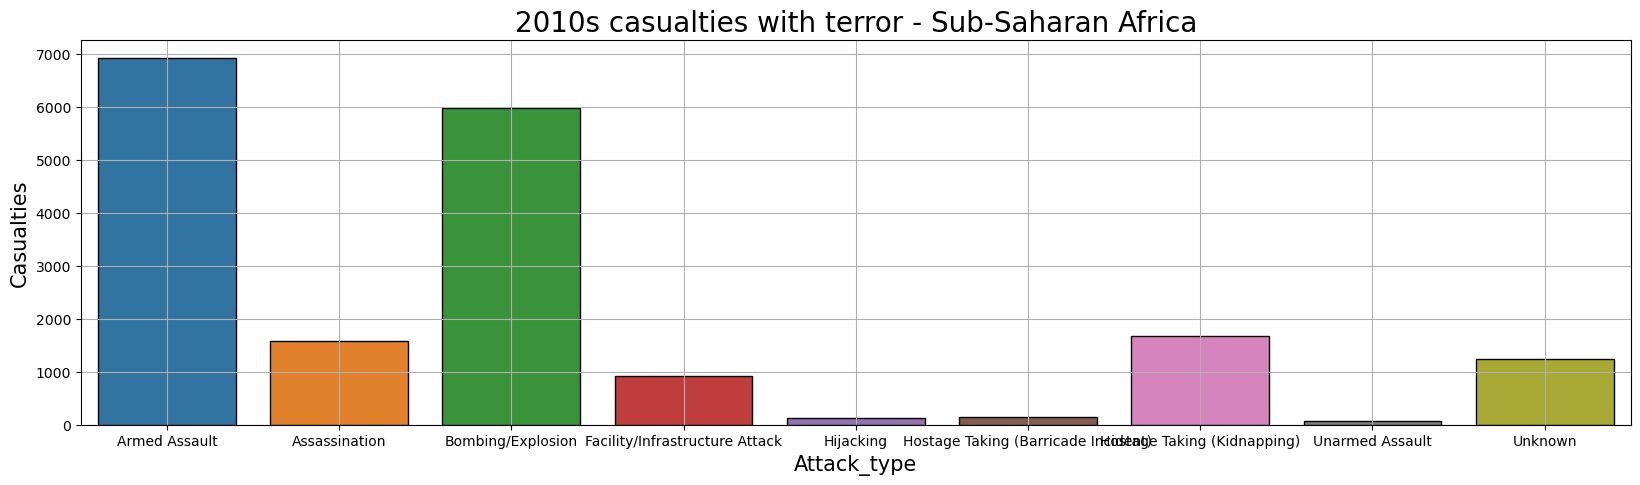

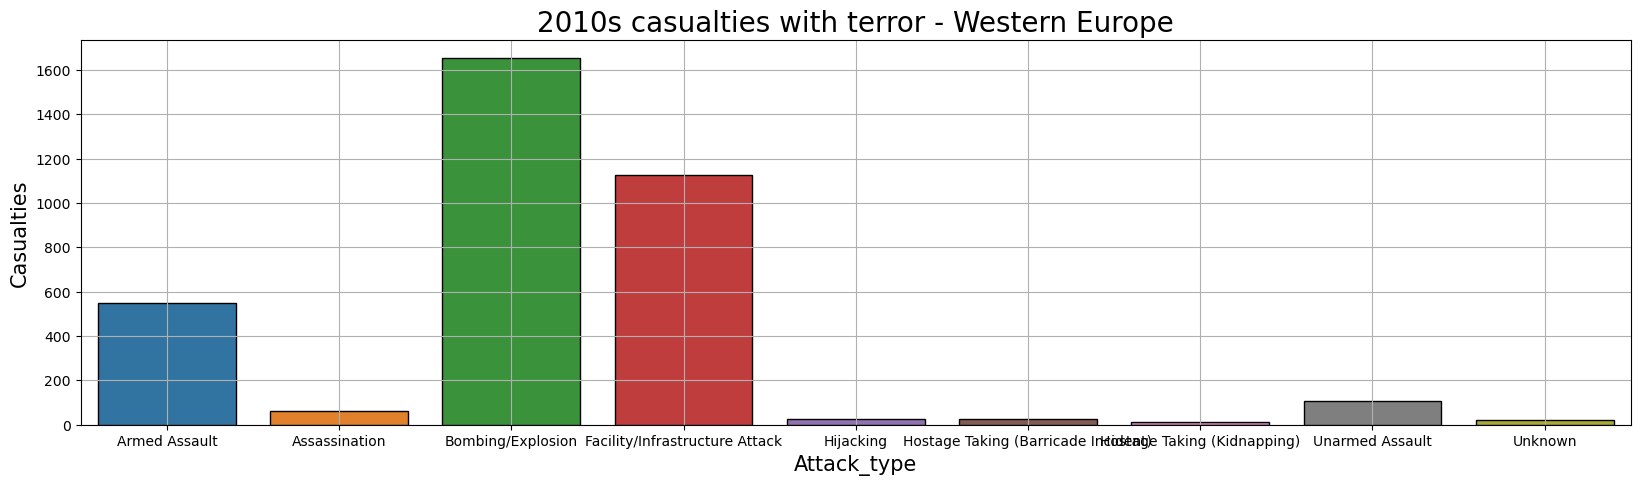

In [190]:
# 문제 6
# 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여
# 70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석해보시오.
step6 = df_terror.groupby([pd.cut(df_terror["iyear"], range(1970, 2021, 10), right=False), "region_txt", "attacktype1_txt"]).count()
step6['casualties'] = step6['nkill'] + step6['nwound']
step6.fillna(0)
step6
step6_1970s = step6.loc[(slice(1970,1979),), :]
step6_1980s = step6.loc[(slice(1980,1989),), :]
step6_1990s = step6.loc[(slice(1990,1999),), :]
step6_2000s = step6.loc[(slice(2000,2009),), :]
step6_2010s = step6.loc[(slice(2010,2019),), :]

step6_1970s = step6_1970s[['nkill', 'nwound', 'casualties']]
step6_1970s = step6_1970s.reset_index()
step6_1980s = step6_1980s[['nkill', 'nwound', 'casualties']]
step6_1980s = step6_1980s.reset_index()
step6_1990s = step6_1990s[['nkill', 'nwound', 'casualties']]
step6_1990s = step6_1990s.reset_index()
step6_2000s = step6_2000s[['nkill', 'nwound', 'casualties']]
step6_2000s = step6_2000s.reset_index()
step6_2010s = step6_2010s[['nkill', 'nwound', 'casualties']]
step6_2010s = step6_2010s.reset_index()

continent_list_1970s = step6_1970s.drop_duplicates(subset='region_txt')
continent_list_1970s = continent_list_1970s.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])
continent_list_1980s = step6_1980s.drop_duplicates(subset='region_txt')
continent_list_1980s = continent_list_1980s.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])
continent_list_1990s = step6_1990s.drop_duplicates(subset='region_txt')
continent_list_1990s = continent_list_1990s.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])
continent_list_2000s = step6_2000s.drop_duplicates(subset='region_txt')
continent_list_2000s = continent_list_2000s.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])
continent_list_2010s = step6_2010s.drop_duplicates(subset='region_txt')
continent_list_2010s = continent_list_2010s.drop(columns=['attacktype1_txt', 'nkill', 'nwound', 'casualties'])

continents_1970s = []
for continent in continent_list_1970s['region_txt']:
    continents_1970s.append(continent)
continents_1980s = []
for continent in continent_list_1980s['region_txt']:
    continents_1980s.append(continent)
continents_1990s = []
for continent in continent_list_1990s['region_txt']:
    continents_1990s.append(continent)
continents_2000s = []
for continent in continent_list_2000s['region_txt']:
    continents_2000s.append(continent)
continents_2010s = []
for continent in continent_list_2010s['region_txt']:
    continents_2010s.append(continent)

print(continents_1970s)
print(continents_1980s)
print(continents_1990s)
print(continents_2000s)
print(continents_2010s)

for continent in continents_2010s:
    plt.figure(figsize=(20,5))
    sns.barplot(data=step6_2010s[step6_2010s['region_txt'] == continent], x='attacktype1_txt',y='casualties',ec='black',lw=1)
    plt.grid(True)
    plt.title('2010s casualties with terror - ' + continent,fontsize=20)
    plt.xlabel('Attack_type',fontsize=15)
    plt.ylabel('Casualties',fontsize=15)
    plt.show()
    



## 1970년대 : 중앙아시아에는 테러 건수가 없었음. 동아시아는 주로 시설물 테러, 동유럽과 중앙아시아&북아프리카는 폭격이 주를 이뤘으며, 그 외 지역에서는 무장공격, 암살, 폭격이 주를 이루었음.

## 1980년대 : 중앙아시아에는 테러 건수가 없었음. 동아시아는 시설물 테러와 함께 폭격도 주 요인이었으며, 호주&오세아니아는 시설물 테러 항목 또한 주를 이루었음. 중앙 아메리카는 마찬가지로 무장공격, 암살, 폭격이 주를 이루었고 북아메리카는 폭격 및 시설물 테러가, 남아메리카는 무장공격, 암살, 폭격이 주를 이루었음. 남부 아시아와 동남아시아는 무장공격, 암살, 폭격이 주를 이루었으며 이는 베트남 전장 여파로 보임. 서남아시아 지역과 서유럽은 주로 폭격이 주를 이루었음.

## 1990년대 : 전체적으로 무장공격, 암살, 폭격, 시설물 타격이 주를 이루는 가운데 유괴 및 미확인 테러도 보이기 시작했음. 전 세계적으로 테러의 방법이 다양해 졌음을 알 수 있음.

## 2000년대 : 테러의 빈도도 증가하면서, 비무장 공격도 보이기 시작하였음. 그러나 아직까지 전 세계적으로 테러의 주류를 이루는 것은 무장공격, 암살, 폭격, 시설물 타격임.

## 2010년대 : 테러의 빈도수가 급증하였음. 그런데 여기서 주를 이루는 것은 무장공격과 폭격과 시설물 타격이었음.

In [208]:
# 문제7
# 우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.
df_terror_korea = df_terror[df_terror['country_txt'] == 'South Korea']
df_terror_korea.drop_duplicates(subset='attacktype1_txt')['attacktype1_txt']
df_terror_korea[['iyear', 'imonth', 'iday', 'attacktype1_txt', 'targsubtype1_txt', 'target1', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'provstate', 'nkill', 'nwound']]


,iyear,imonth,iday,attacktype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,weapsubtype1_txt,provstate,nkill,nwound
2514,1974,8,15,Assassination,Head of State,"wife, Pres. Chung Hu Park",Korean Youth League,Firearms,Handgun,NaN,1.0,0.0
15734,1982,3,18,Facility/Infrastructure Attack,Embassy/Consulate,US Government Information Office,Unknown,Incendiary,NaN,Busan,1.0,3.0
19820,1983,9,22,Bombing/Explosion,Embassy/Consulate,US Cultural Center (housed in a 5 story building),Unknown,Explosives,Time Fuse,Daegu,1.0,4.0
29151,1986,9,14,Bombing/Explosion,Airport,Kimpo International Airport,Unknown,Explosives,Unknown Explosive Type,Seoul,5.0,19.0
29696,1986,12,15,Armed Assault,Government Building/Facility/Office,US Information Svce Bldg,Student Radicals,Melee,Blunt Object,NaN,0.0,11.0
33678,1988,3,4,Bombing/Explosion,Retail/Grocery/Bakery,Angel Coffee Shop,Unknown,Explosives,Unknown Explosive Type,Busan,0.0,0.0
33835,1988,3,18,Facility/Infrastructure Attack,Military Unit/Patrol/Convoy,U.S. Engineering Unit,Unknown,Incendiary,NaN,Seoul,0.0,0.0
34532,1988,5,23,Facility/Infrastructure Attack,Embassy/Consulate,U.S. Information Service,Unknown,Incendiary,Molotov Cocktail/Petrol Bomb,Gwangju,0.0,0.0
34562,1988,5,26,Facility/Infrastructure Attack,Bank/Commerce,Bank,Unknown,Incendiary,NaN,Seoul,0.0,0.0
34737,1988,6,13,Facility/Infrastructure Attack,Embassy/Consulate,U.S. Cultural Center,Unknown,Incendiary,NaN,NaN,0.0,0.0


### 우리나라의 테러는 현재까지 총 38건으로 집계되며, 테러의 방법은 암살, 시설물 타격, 폭격, 무장공격, 미상, 비무장 공격, 유괴가 있었음.
### 암살의 경우 1974.8.15(박정희 대통령 암살 기도 / 육영수 여사 사망) / 1992.8.4.(대한항공 775편 기습 탈출 사건) / 2015.3.5. 등이 있었고, 테러의 대부분은 86년 ~ 00년이었음.
### 사망자는 5명 아래였으며, 부상자는 최대 60명 까지 있었음. 타격 목표는 주로 군/경 관련 건물 및 대사관이었음. 희생자의 신원은 대부분이 미상임.
### 대한민국 테러 건수는 38건으로 어떤 형식인지 데이터 프레임 형식으로 한눈에 보이므로 굳이 시각화를 진행하지 않았음.

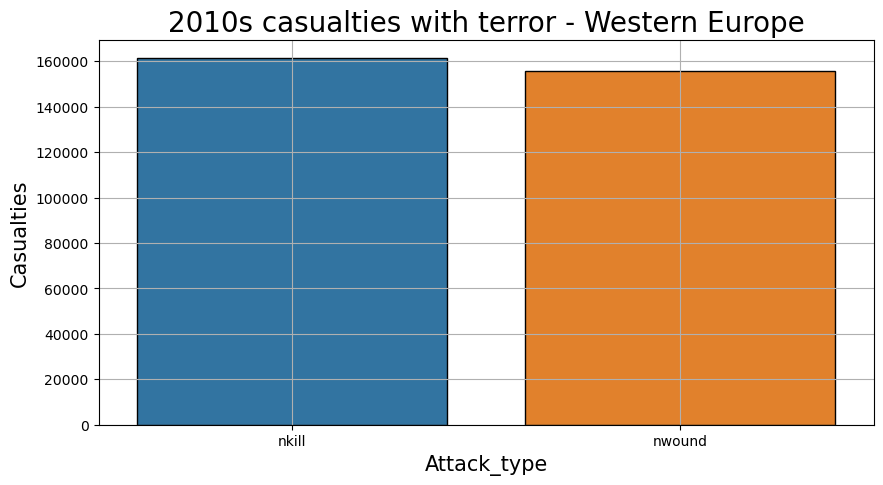

In [231]:
# 문제8
# 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.
# 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.
step8 = df_terror.groupby(['targsubtype1_txt']).count().reset_index()
casualties = pd.DataFrame(step8[['nkill', 'nwound']].sum()).reset_index()
casualties.columns = ['Victims', 'Count']

plt.figure(figsize=(10,5))
sns.barplot(data=casualties, x='Victims', y='Count', ec='black',lw=1)
plt.grid(True)
plt.title('2010s casualties with terror - ' + continent,fontsize=20)
plt.xlabel('Attack_type',fontsize=15)
plt.ylabel('Casualties',fontsize=15)
plt.show()

In [244]:
step8_target = df_terror.groupby(['targsubtype1_txt']).describe()
step8_target[['nkill', 'nwound']]

nkill                                      \
                                count      mean        std  min  25%  50%   
targsubtype1_txt                                                            
Affiliated Institution          349.0  2.220630   8.753655  0.0  0.0  0.0   
Aircraft (not at an airport)    403.0  7.263027  32.822079  0.0  0.0  0.0   
Airline Officer/Personnel       354.0  0.183616   0.892311  0.0  0.0  0.0   
Airport                         466.0  1.663090   5.627143  0.0  0.0  0.0   
Alleged Informant               427.0  1.871194   2.988207  0.0  1.0  1.0   
...                               ...       ...        ...  ...  ...  ...   
Train/Train Tracks/Trolley     2101.0  1.827225  10.819081  0.0  0.0  0.0   
Unnamed Civilian/Unspecified  11076.0  3.823583  21.460147  0.0  0.0  1.0   
Vehicles/Transportation        2803.0  1.556190   3.418047  0.0  0.0  0.0   
Village/City/Town/Suburb       5734.0  7.121032  18.463139  0.0  0.0  2.0   
Water Supply                    209.0  0.698565   3.225506  0.0  0.0  0.0   

                                            nwound                             \
                              75%     max    count      mean         std  min   
targsubtype1_txt                                                                
Affiliated Institution        1.0    91.0    344.0  4.787791   25.744059  0.0   
Aircraft (not at an airport)  0.0   329.0    394.0  1.555838    9.321958  0.0   
Airline Officer/Personnel     0.0    10.0    351.0  0.980057    4.571608  0.0   
Airport                       0.0    48.0    459.0  5.492375   23.600788  0.0   
Alleged Informant             2.0    40.0    434.0  0.184332    1.038801  0.0   
...                           ...     ...      ...       ...         ...  ...   
Train/Train Tracks/Trolley    0.0   259.0   2093.0  6.170569   35.367911  0.0   
Unnamed Civilian/Unspecified  3.0  1384.0  10658.0  6.170482  113.156220  0.0   
Vehicles/Transportation       2.0    48.0   2759.0  1.606379    4.210838  0.0   
Village/City/Town/Suburb      7.0   433.0   5006.0  4.055134   24.449474  0.0   
Water Supply                  0.0    32.0    205.0  0.702439    2.976088  0.0   

                                                     
                              25%  50%  75%     max  
targsubtype1_txt                                     
Affiliated Institution        0.0  0.0  1.0   351.0  
Aircraft (not at an airport)  0.0  0.0  0.0   150.0  
Airline Officer/Personnel     0.0  0.0  0.0    70.0  
Airport                       0.0  0.0  1.0   285.0  
Alleged Informant             0.0  0.0  0.0    15.0  
...                           ...  ...  ...     ...  
Train/Train Tracks/Trolley    0.0  0.0  1.0   817.0  
Unnamed Civilian/Unspecified  0.0  1.0  5.0  8191.0  
Vehicles/Transportation       0.0  0.0  2.0   120.0  
Village/City/Town/Suburb      0.0  0.0  3.0  1500.0  
Water Supply                  0.0  0.0  0.0    26.0  

[112 rows x 16 columns]